# Import library

In [3]:
import win32com.client as com
import os
import numpy as np
import pandas as pd
import random 
import glob
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Button
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.utils.data as utils
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn
from sklearn.externals import joblib

# Load Vissim File

In [4]:
Vissim = com.Dispatch("Vissim.Vissim")
#Vissim = com.gencache.EnsureDispatch('Vissim.Vissim')
filename = os.getcwd() + '\AA_S1_test.inpx'
Vissim.LoadNet(filename)

# Vissim code

In [ ]:
# Chose Random Seed
#Random_Seed = 99
#Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)

# To start a simulation you can run a single step:
#Vissim.Simulation.RunSingleStep()
# Or run the simulation continuous (it stops at breakpoint or end of simulation)
#End_of_simulation = 600 # simulation second [s]
#Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
#Sim_break_at = 200 # simulation second [s]
#Vissim.Simulation.SetAttValue('SimBreakAt', Sim_break_at)
# Set maximum speed:
#Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)
# Hint: to change the simulation speed use: Vissim.Simulation.SetAttValue('SimSpeed', 10) # 10 => 10 Sim. sec. / s
#Vissim.Simulation.RunContinuous()
# To stop the simulation:
#Vissim.Simulation.Stop()

In [9]:
# Access during simulation 
Sim_break_at = 150 # simulation second [s]
Vissim.Simulation.SetAttValue('SimBreakAt', Sim_break_at)
Vissim.Simulation.RunContinuous() # start the simulation until SimBreakAt

In [20]:
# Method #1: Information about all vehicles in the network (in the current simulation second)
all_veh_attributes = Vissim.Net.Vehicles.GetMultipleAttributes(('No', 'VehType', 'Speed', 'Pos', 'Lane'))
for cnt in range(len(all_veh_attributes)):
    print ('%s  |  %s  |  %.2f  |  %.2f  |  %s' % 
           (all_veh_attributes[cnt][0], 
            all_veh_attributes[cnt][1], 
            all_veh_attributes[cnt][2], 
            all_veh_attributes[cnt][3], 
            all_veh_attributes[cnt][4])) # only display the 2nd column

1  |  100  |  57.20  |  2322.16  |  2-1
2  |  100  |  58.35  |  2328.79  |  11-1
5  |  100  |  48.12  |  2053.55  |  2-2
6  |  100  |  51.24  |  288.06  |  7-1
7  |  100  |  55.67  |  2299.81  |  2-1
8  |  100  |  57.28  |  2210.83  |  11-2
9  |  100  |  55.94  |  2225.73  |  11-1
10  |  100  |  51.32  |  1866.70  |  11-2
11  |  100  |  49.91  |  1950.19  |  11-1
12  |  100  |  48.22  |  1834.63  |  2-2
13  |  100  |  46.50  |  1808.89  |  1-1
14  |  100  |  51.96  |  1937.89  |  11-2
15  |  100  |  47.09  |  1769.66  |  2-1
16  |  100  |  50.80  |  270.64  |  7-1
17  |  100  |  48.39  |  1797.31  |  2-2
18  |  100  |  50.06  |  54.21  |  9-1
19  |  100  |  54.21  |  2006.32  |  1-2
20  |  100  |  55.77  |  95.55  |  9-1
21  |  100  |  45.60  |  1788.64  |  1-1
22  |  100  |  52.54  |  123.39  |  9-1
23  |  100  |  52.68  |  1886.31  |  11-1
24  |  100  |  47.84  |  1690.06  |  2-1
25  |  100  |  56.04  |  1950.17  |  1-2
26  |  100  |  54.47  |  1749.69  |  11-2
27  |  100  |  50.31  

In [19]:
# Method #2: Loop over all Vehicles using Object Enumeration
for Vehicle in Vissim.Net.Vehicles:
    veh_number =    Vehicle.AttValue('No')
    veh_type =      Vehicle.AttValue('VehType')
    veh_speed =     Vehicle.AttValue('Speed')
    veh_position =  Vehicle.AttValue('Pos')
    veh_linklane =  Vehicle.AttValue('Lane')
    print ('%s  |  %s  |  %.2f  |  %.2f  |  %s' % (veh_number, veh_type, veh_speed, veh_position, veh_linklane))

1  |  100  |  57.20  |  2322.16  |  2-1
2  |  100  |  58.35  |  2328.79  |  11-1
5  |  100  |  48.12  |  2053.55  |  2-2
6  |  100  |  51.24  |  288.06  |  7-1
7  |  100  |  55.67  |  2299.81  |  2-1
8  |  100  |  57.28  |  2210.83  |  11-2
9  |  100  |  55.94  |  2225.73  |  11-1
10  |  100  |  51.32  |  1866.70  |  11-2
11  |  100  |  49.91  |  1950.19  |  11-1
12  |  100  |  48.22  |  1834.63  |  2-2
13  |  100  |  46.50  |  1808.89  |  1-1
14  |  100  |  51.96  |  1937.89  |  11-2
15  |  100  |  47.09  |  1769.66  |  2-1
16  |  100  |  50.80  |  270.64  |  7-1
17  |  100  |  48.39  |  1797.31  |  2-2
18  |  100  |  50.06  |  54.21  |  9-1
19  |  100  |  54.21  |  2006.32  |  1-2
20  |  100  |  55.77  |  95.55  |  9-1
21  |  100  |  45.60  |  1788.64  |  1-1
22  |  100  |  52.54  |  123.39  |  9-1
23  |  100  |  52.68  |  1886.31  |  11-1
24  |  100  |  47.84  |  1690.06  |  2-1
25  |  100  |  56.04  |  1950.17  |  1-2
26  |  100  |  54.47  |  1749.69  |  11-2
27  |  100  |  50.31  

In [61]:
## Operations at one specific vehicle:
All_Vehicles = Vissim.Net.Vehicles.GetAll() 
Vehicle = All_Vehicles[0]
Vehicle.AttValue('No')

1

In [62]:
Vehicle.AttValue('Speed')

30.183964707727803

In [59]:
Vehicle.SetAttValue('Speed', 30)

In [ ]:
# alternatively with ItemByKey:
veh_number = 1 
Vehicle = Vissim.Net.Vehicles.ItemByKey(veh_number)
Vehicle.AttValue('No'), Vehicle.AttValue('VehType')

In [25]:
# Set Desired Speed to a vehicle:
DesSpeed_new = 30
Vehicle.SetAttValue('DesSpeed', DesSpeed_new)

# Simulation function

In [6]:
def Initial():
    Acc_max_dict = {'100': max(min(np.round(random.gauss(9.5, 0.2), 3), 10), 8.5), 
             '101': max(min(np.round(random.gauss(2.5, 0.2), 3), 3), 2), 
             '102': max(min(np.round(random.gauss(1, 0.2), 3), 1.5), 0.5)}  
    DesSpeed_dict = {'100': 60, '101': 40, '102': 35}
    print(Acc_max_dict)    
    print(DesSpeed_dict)      
    return Acc_max_dict, DesSpeed_dict

In [7]:
def Change_to_dry():
    global Vehicles_prev, VehType, Acc_max, DesSpeed
    
    VehType = '100'
    Acc_max = Acc_max_dict[VehType]
    DesSpeed = DesSpeed_dict[VehType]
      
    for Vehicle in Vissim.Net.Vehicles:
        Vehicle.SetAttValue('VehType', VehType)
        Vehicle.SetAttValue('DesSpeed', DesSpeed + max(min(random.gauss(0, 2),6),-6))

In [8]:
def Change_pavement(VehType):
    Vissim.Simulation.RunSingleStep()
    Acc_max = Acc_max_dict[VehType]
    DesSpeed = DesSpeed_dict[VehType]
    
    for Vehicle in Vissim.Net.Vehicles:
        Vehicle.SetAttValue('VehType', VehType)
        Vehicle.SetAttValue('DesSpeed', DesSpeed + max(min(random.gauss(0, 2),6),-6)
   

    print(f'Acc_max: {Acc_max} DesSpeed: {DesSpeed}')
    return Acc_max, DesSpeed

In [9]:
def Save_vehicles_data():
    vehicles_prev = Vissim.Net.Vehicles.GetMultipleAttributes(('No', 'Acceleration', 'Speed', 'WheelSpeed'))
    vehicles_prev = np.asarray(vehicles_prev)
    return vehicles_prev

In [10]:
def Get_all_Veh_number():
    veh_numbers = Vissim.Net.Vehicles.GetMultiAttValues('No')
    veh_numbers = np.asarray(veh_numbers)[:,1]
    return veh_numbers

In [11]:
def SnowIce_pavement(Vehicles_prev):
    # Vehicles_prev['No', 'Acceleration', 'Speed', 'WheelSpeed']  No null values
    
    if Vissim.Net.Vehicles:    
        for Vehicle in Vissim.Net.Vehicles:
            try:
                index = np.where(Vehicles_prev[:,0] == Vehicle.AttValue('No'))[0][0]
                Speed_cur = Vehicle.AttValue('Speed')
                Acc_prev = Vehicles_prev[index, 1]

                if abs(Acc_prev) <= Acc_max:             
                    if Speed_cur == 0:
                        WheelSpeed = 0
                    else:
                        WheelSpeed = max(Speed_cur + random.gauss(0, 1), 0)               
                else:
                    Speed_prev = Vehicles_prev[index, 2]
                    WheelSpeed_prev = Vehicles_prev[index, 3]
                    WheelSpeed = min(max(WheelSpeed_prev + Acc_prev * 0.1 * 3.6, 0), 100)
                    if WheelSpeed == 0:
                        Speed_cur = 0
                    else:
                        Speed_cur = max(Speed_prev + Acc_max * 0.1 * 3.6 * np.sign(Acc_prev), 0)
                    
                Vehicle.SetAttValue('WheelSpeed', WheelSpeed)
                Vehicle.SetAttValue('Speed', Speed_cur)

                if Vehicle.AttValue('DesSpeed') > DesSpeed + 6:
                    Vehicle.SetAttValue('DesSpeed', DesSpeed + max(min(random.gauss(0, 2),6),-6))
                
            except:
                Vehicle.SetAttValue('VehType', VehType)
                Vehicle.SetAttValue('DesSpeed', DesSpeed + max(min(random.gauss(0, 2),6),-6))
                Vehicle.SetAttValue('WheelSpeed', max(Vehicle.AttValue('Speed') + random.gauss(0, 0.3), 0))

# S1 dry(0~900s) - snow(900~2700) - ice(2700~4500)

## Generate training data

In [12]:
Acc_max_dict, DesSpeed_dict = Initial()

{'100': 9.468, '101': 2.595, '102': 0.614}
{'100': 60, '101': 35, '102': 30}


In [17]:
for _ in range(500):
    Vissim.Simulation.RunSingleStep()
    Dry_pavement()

In [18]:
VehType = '102'
Acc_max, DesSpeed = Change_pavement(VehType)

for _ in range(500):
    Vehicles_prev = Save_vehicles_data()
    Vissim.Simulation.RunSingleStep()
    SnowIce_pavement(Vehicles_prev)

Acc_max: 0.614 DesSpeed: 30


In [19]:
VehType = '100'
Acc_max, DesSpeed = Change_pavement(VehType)

for _ in range(500):
    Vissim.Simulation.RunSingleStep()
    Dry_pavement()

Acc_max: 9.468 DesSpeed: 60


## Test performance

### Load model

In [5]:
%matplotlib notebook

In [6]:
class Time_Series_Data(Dataset):
    def __init__(self, train_x, train_y):
        self.X = train_x
        self.y = train_y
    def __getitem__(self, item):
        x_t = self.X[item]
        y_t = self.y[item]
        return x_t, y_t
    def __len__(self):
        return len(self.X)  
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, output_size=3):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [10]:
Acc_max_dict = {'100': 8.5, '101': 3.4, '102': 1.7}  
DesSpeed_dict = {'100': 60, '101': 42, '102': 36}
inter_points = np.array([[2771, 1360], [-19,-57], [466, -430], [2142, -344], [3212, -1414], [2830, -283]])
scaler = joblib.load("../scaler")
locations = np.load('../locations.npy')

input_size = 4
hidden_size = 256
num_layers = 4
dropout = 0.1
model = LSTM(input_size, hidden_size, num_layers, dropout)
model.load_state_dict(torch.load('../models/S1_LSTM_Bayes.pth')['model'])
model = model.cuda()
model.eval()

LSTM(
  (lstm): LSTM(4, 256, num_layers=4, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

### Process real-time data from Vissim

In [11]:
def assign_intersection(row):
    x, y = row[0], row[1]
    dist = (inter_points[:,0]-x)**2 + (inter_points[:,1]-y)**2
    index  = np.argmin(dist)
    if dist[index] <= 10000:
        return index + 1
    else:
        return 0

In [12]:
def transmit_data_to_RSE():
    ds = Vissim.Net.Vehicles.GetMultipleAttributes((
            'SimSec','No','CoordFrontX','CoordFrontY','Acceleration', 'Speed', 'WheelSpeed'))
    if len(ds) != 0:
        ds = np.asarray(ds, dtype=np.float32)
        ds = ds[~(ds[:,6] == None)]
        ds = np.round(ds, 2)
        inter_no = np.apply_along_axis(assign_intersection, 1, ds[:,2:4])
        for key in RSE:
            RSE[key].append(ds[np.where(inter_no == key)])

### Predict pavement type

In [13]:
def predict(model, dataloader):
    num_elements = len(dataloader.dataset)
    num_batches = len(dataloader)
    batch_size = dataloader.batch_size
    predictions = torch.zeros(num_elements).cuda()
    for i, (data, _) in enumerate(dataloader):
        start = i*batch_size
        end = start + batch_size
        if i == num_batches - 1:
            end = num_elements
        pred = model(data.cuda())
        pred = torch.max(pred.data, 1)[1]
        predictions[start:end] = pred
    return predictions.cpu().numpy()

In [14]:
def prediction_in_RSE(window=10, cluster=False, keep_RSE=False):
    # RSE[key] = ['SimSec','No','CoordFrontX','CoordFrontY','Acceleration', 'Speed', 'WheelSpeed']
    global info_to_CV
    info_to_CV = {1:[0,0,0,0],2:[0,0,0,0],3:[0,0,0,0],4:[0,0,0,0],5:[0,0,0,0],6:[0,0,0,0]}
    for key in RSE:
        if not RSE[key]:
            RSE[key].append([[], []]) #0 for dty
            continue
        vehs = np.concatenate(RSE[key], axis=0)
        samples = []
        locations = []
        for veh_no in set(vehs[:,1]):
            veh = vehs[vehs[:,1] == veh_no]
            gps_acc = np.round((veh[1:,5] - veh[0:-1,5])/0.36,2) # calculate driving acceleration
            veh = np.hstack((veh[1:,:], gps_acc.reshape(-1,1)))
            rows = np.asarray(range(0, len(veh)-window+1, 5))           
            for row in rows:
                temp = veh[row:row+window,:]
                if len(temp[temp[:,5] == 0]) >= 5:
                    continue
                locations.append([temp[9,0],veh_no,np.mean(temp[:,2]),np.mean(temp[:,3])]) #[SimSec, No, X, Y]
                samples.append(temp[:,[7,4,5,6]]) #['ACCELERATION', 'WACCELERATION', 'SPEED', 'WHEELSPEED']
        if not samples:
            RSE[key].append([[], []])
            continue
        samples = np.asarray(samples)
        locations = np.asarray(locations)
        targets = np.zeros([len(samples), 1])
        
        samples_scaled = scaler.transform(samples.reshape(-1,4)).reshape(-1,10,4).astype('float32')
        targets = targets.astype('int64')
        batch_size = 512
        test_ds = Time_Series_Data(samples_scaled, targets)
        test_loader = DataLoader(dataset = test_ds, batch_size=batch_size)
        test_pred = predict(model, test_loader)
        if cluster:
            test_pred, final_pred = cluster_filter(test_pred)
            RSE[key].append([test_pred, locations])
            info_to_CV[key[0]][key[1]] = final_pred
            if keep_RSE:
                RSE_store[key].append([samples, test_pred, locations])               
        else:           
            RSE[key].append([test_pred, locations])
            if keep_RSE:
                RSE_store[key].append([samples, test_pred, locations])

In [15]:
def init():
    global RSE
    RSE = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
    loc = locations[(locations[:,5] <= 500)]
    for key in range(1,7):
        ax = ax_list[key-1]
        ax.scatter(loc[loc[:,3] == key, 0], loc[loc[:,3] == key, 1], c='y')
        ax.scatter([], [], c='b', label='Dry')
        ax.scatter([], [], c='g', label='Snow')
        ax.scatter([], [], c='r', label='Ice')
        ax.legend()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f'Detected Road Type at #{key} Inter')

### One-time visulization

In [38]:
def plot_detected_road_location(background):
    #background = [Lons, Lats, veh_no, inter_no, max_acc, Time]
    #RSE_locations = [SimSec, No, X, Y]
    #pave_type = 0,1,2
    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    loc = background[(background[:,5] <= 500)]

    for key in RSE:
        plt.subplot(2,3,key)
        plt.scatter(loc[loc[:,3] == key, 0], loc[loc[:,3] == key, 1], c='y')
        
        pred = RSE[key][-1][0]
        if pred != []:
            loc_RSE = RSE[key][-1][1]   
            loc_dry = loc_RSE[pred == 0]
            loc_snow = loc_RSE[pred == 1]
            loc_ice = loc_RSE[pred == 2]
     
            plt.scatter(loc_dry[:,2], loc_dry[:,3], c='g', label='Dry')
            plt.scatter(loc_snow[:,2], loc_snow[:,3], c='b', label='Snow')
            plt.scatter(loc_ice[:,2], loc_ice[:,3], c='r', label='Ice')
            plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Detected Road Type at #{key} Inter')

<IPython.core.display.Javascript object>


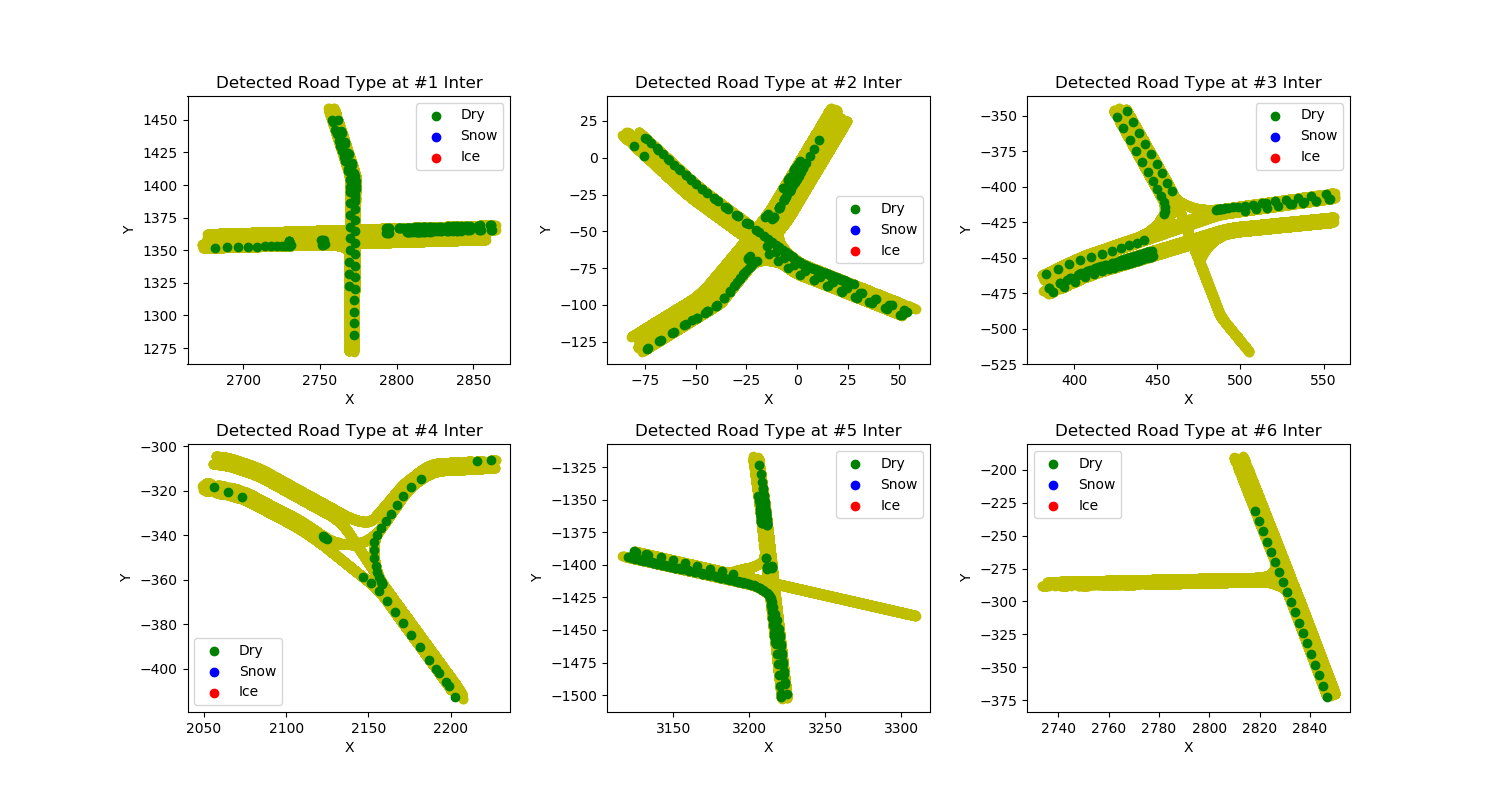

In [42]:
interval = 101
count = 0
background = 1
RSE = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

for _ in range(101):       
    Vissim.Simulation.RunSingleStep()
    transmit_data_to_RSE()
    count += 1
    if count == interval:
        prediction_in_RSE()
        plot_detected_road_location(locations)

In [9]:
%matplotlib notebook

In [127]:
def plot_prediction(i):
    #background = [Lons, Lats, veh_no, inter_no, max_acc, Time]
    #RSE_locations = [SimSec, No, X, Y]
    #pave_type = 0,1,2
    global plot
    
    if plot == False:
        return
    
    for key in RSE:     
        pred = RSE[key][-1][0]
        ax = ax_list[key-1]
        if pred != []:      
            loc_RSE = RSE[key][-1][1]   
            loc_dry = loc_RSE[pred == 0]
            loc_snow = loc_RSE[pred == 1]
            loc_ice = loc_RSE[pred == 2]

#            ax.scatter(loc_dry[:,2], loc_dry[:,3], c='b', label='Dry')
            ax.scatter(loc_snow[:,2], loc_snow[:,3], c='g', label='Snow')
            ax.scatter(loc_ice[:,2], loc_ice[:,3], c='r', label='Ice')
    fig.suptitle(f'Time: {loc_RSE[0,0]:.1f} (s)')
    plot = False

In [137]:
def single_run_RSE(interval = 21):
    global RSE, plot
    RSE = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
    for _ in range(interval):       
        Vissim.Simulation.RunSingleStep()
        transmit_data_to_RSE()
    prediction_in_RSE()
    plot = True

In [ ]:
#axprev = plt.axes([0, 0.9, 0.05, 0.05])
#bnext = Button(axprev, 'Run')
#bnext.on_clicked(single_run_RSE)

In [134]:
single_run_RSE() 

<IPython.core.display.Javascript object>


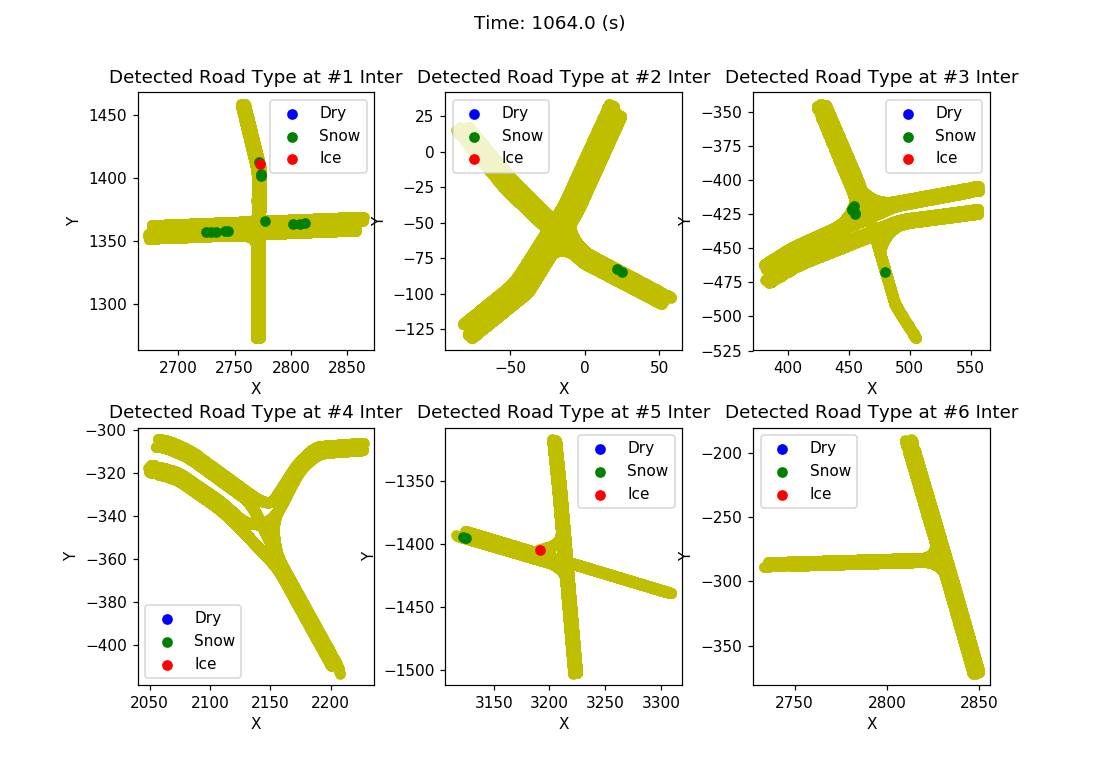

In [129]:
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Time: {0:.1f} (s)')
ax_list = [fig.add_subplot(2,3,i) for i in range(1,7)]
plot = False

animation.FuncAnimation(fig, plot_prediction, interval=100, init_func=init, blit = True)

### Real-time visulization

In [ ]:
def single_run_RSE_real_time(interval = 21):
    global RSE, RSE_store
    RSE = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
    for _ in range(interval):       
        Vissim.Simulation.RunSingleStep()
        transmit_data_to_RSE()
    prediction_in_RSE()

#### Plt.ion

In [15]:
plt.ion()
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Time: {0:.1f} (s)')
ax_list = [fig.add_subplot(2,3,i) for i in range(1,7)]

RSE_store = dict(zip(all_keys,[[] for _ in range(24)]))
loc = locations[(locations[:,5] <= 500)]
for key in range(1,7):
    ax = ax_list[key-1]
    ax.scatter(loc[loc[:,3] == key, 0], loc[loc[:,3] == key, 1], c='y')
    ax.scatter([], [], c='b', label='Dry')
    ax.scatter([], [], c='g', label='Snow')
    ax.scatter([], [], c='r', label='Ice')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Detected Road Type at #{key} Inter')
    
for _ in range(10):
    single_run_RSE_real_time(interval = 101)
    for key in RSE:     
        pred = RSE[key][-1][0]
        ax = ax_list[key-1]
        if pred != []:      
            loc_RSE = RSE[key][-1][1]   
            loc_dry = loc_RSE[pred == 0]
            loc_snow = loc_RSE[pred == 1]
            loc_ice = loc_RSE[pred == 2]

            ax.scatter(loc_dry[:,2], loc_dry[:,3], c='b', label='Dry')
            ax.scatter(loc_snow[:,2], loc_snow[:,3], c='g', label='Snow')
            ax.scatter(loc_ice[:,2], loc_ice[:,3], c='r', label='Ice')
       
    fig.suptitle(f"Time: {(Vissim.Simulation.AttValue('SimSec')):.1f} (s)")
    fig.canvas.draw()
    fig.canvas.flush_events()

#### Plt.animation

In [12]:
def plot_prediction_real_time(i):
    #background = [Lons, Lats, veh_no, inter_no, max_acc, Time]
    #RSE_locations = [SimSec, No, X, Y]
    #pave_type = 0,1,2    
    single_run_RSE_real_time(interval = 101)
    for key in RSE:     
        pred = RSE[key][-1][0]
        ax = ax_list[key-1]
        if pred != []:      
            loc_RSE = RSE[key][-1][1]   
            loc_dry = loc_RSE[pred == 0]
            loc_snow = loc_RSE[pred == 1]
            loc_ice = loc_RSE[pred == 2]

            ax.scatter(loc_dry[:,2], loc_dry[:,3], c='b', label='Dry')
            ax.scatter(loc_snow[:,2], loc_snow[:,3], c='g', label='Snow')
            ax.scatter(loc_ice[:,2], loc_ice[:,3], c='r', label='Ice')
    fig.suptitle(f"Time: {(Vissim.Simulation.AttValue('SimSec')):.1f} (s)")

In [14]:
RSE_store = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

<IPython.core.display.Javascript object>


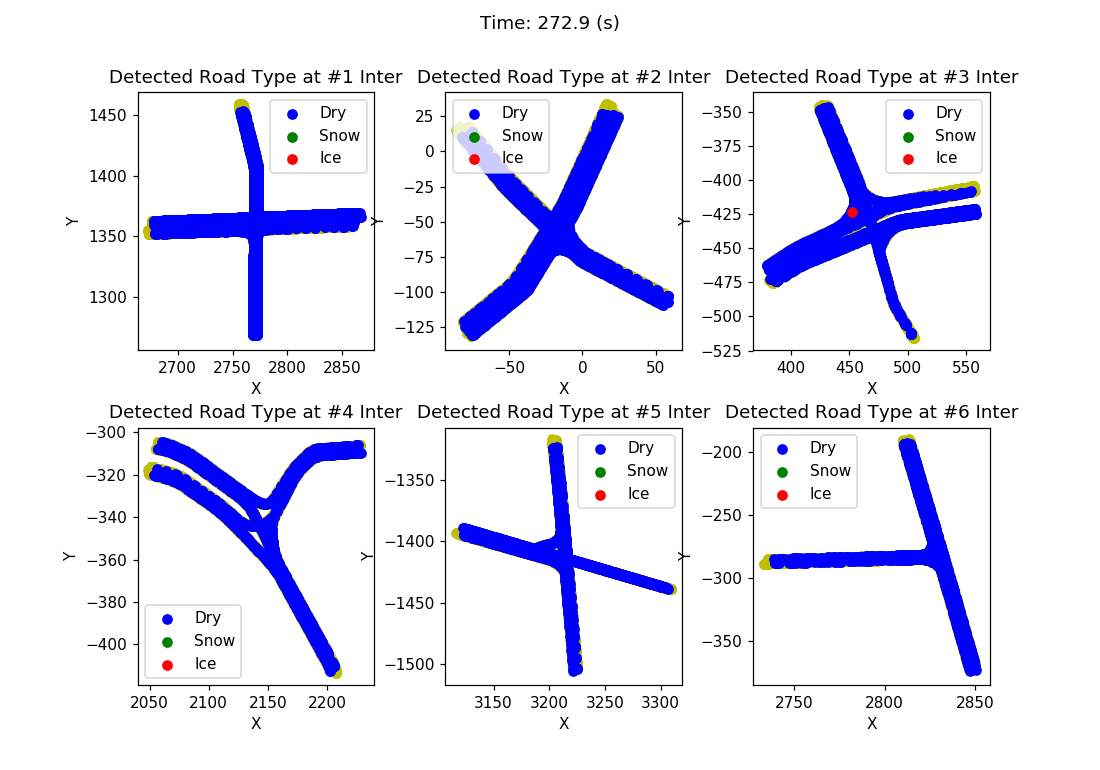

In [13]:
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f'Time: {0:.1f} (s)')
ax_list = [fig.add_subplot(2,3,i) for i in range(1,7)]

ani = animation.FuncAnimation(fig, plot_prediction_real_time, interval=100, init_func=init, blit = True)

### Result evaluation

In [11]:
#np.save('RSE_store.npy', RSE_store) 
RSE_store = np.load('RSE_store.npy').item()

In [25]:
all_pred = []
pred_time = []
for key in RSE_store:
    data = []
    pred = []
    loc = []
    for row in RSE_store[key]:
        data.append(row[0])
        pred.append(row[1])
        loc.append(row[2])
    data = np.concatenate(data, axis=0)
    pred = np.concatenate(pred, axis=0)
    loc = np.concatenate(loc, axis=0)
    all_pred.append(pred)
    pred_time.append(loc[:,0])
    
    dry_dry, dry_snow, dry_ice =  len(pred[(loc[:,0]<=500) & (pred==0)]), len(pred[(loc[:,0]<=500) & (pred==1)]), len(pred[(loc[:,0]<=500) & (pred==2)])
    snow_dry, snow_snow, snow_ice = len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==0)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==1)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==2)])
    ice_dry, ice_snow, ice_ice = len(pred[(loc[:,0]>1000) & (pred==0)]), len(pred[(loc[:,0]>1000) & (pred==1)]), len(pred[(loc[:,0]>1000) & (pred==2)])
    if ice_snow+snow_snow+dry_snow == 0:
        snow_precision = 1
    elif ice_ice+snow_ice+dry_ice == 0:
        ice_precision = 1
    else:      
        snow_precision = np.round(snow_snow/(ice_snow+snow_snow+dry_snow),4)
        ice_precision = np.round(ice_ice/(ice_ice+snow_ice+dry_ice),4)        
    print(f'Inter #{key}: dry:{dry_dry,dry_snow,dry_ice} snow:{snow_dry,snow_snow,snow_ice} ice:{ice_dry,ice_snow,ice_ice} precision:{snow_precision,ice_precision}')  

all_pred = np.concatenate(all_pred, axis=0)
pred_time = np.concatenate(pred_time, axis=0)
snow_precision_all = len(all_pred[(all_pred==1)&(pred_time>500)&(pred_time<=1000)])/len(all_pred[all_pred==1])
ice_precision_all = len(all_pred[(all_pred==2)&(pred_time>1000)])/len(all_pred[all_pred==2])
print(f'Overall precision:{snow_precision_all,ice_precision_all}')

Inter #(1, 0): dry:(2209, 0, 0) snow:(1982, 292, 3) ice:(2249, 157, 1805) precision:(0.6503, 0.9983)
Inter #(1, 1): dry:(1188, 0, 0) snow:(1695, 0, 0) ice:(2253, 0, 124) precision:(1, 0.9983)
Inter #(1, 2): dry:(2831, 0, 1) snow:(3739, 195, 4) ice:(4285, 80, 1125) precision:(0.7091, 0.9956)
Inter #(1, 3): dry:(3431, 0, 0) snow:(3536, 313, 4) ice:(3587, 139, 1740) precision:(0.6925, 0.9977)
Inter #(2, 0): dry:(921, 0, 0) snow:(912, 106, 0) ice:(1009, 34, 432) precision:(0.7571, 1.0)
Inter #(2, 1): dry:(1217, 0, 0) snow:(1734, 112, 3) ice:(1686, 45, 682) precision:(0.7134, 0.9956)
Inter #(2, 2): dry:(3205, 2, 1) snow:(4626, 230, 20) ice:(4064, 68, 787) precision:(0.7667, 0.974)
Inter #(2, 3): dry:(2685, 0, 0) snow:(3546, 151, 6) ice:(3625, 41, 628) precision:(0.7865, 0.9905)
Inter #(3, 0): dry:(1789, 2, 53) snow:(2229, 267, 38) ice:(1697, 98, 889) precision:(0.7275, 0.9071)
Inter #(3, 1): dry:(1239, 0, 2) snow:(1986, 117, 1) ice:(1905, 48, 495) precision:(0.7091, 0.994)
Inter #(3, 2): dr

In [51]:
road_type_freq = []
pred_t = []
for key in RSE_store:   
    for row in RSE_store[key]:
        road_type_freq.append([sum(row[1]==1),sum(row[1]==2)])
        pred_t.append(max(row[2][:,0]))  
road_type_freq = np.asarray(road_type_freq)
pred_t = np.asarray(pred_t)

In [ ]:
%matplotlib inline 
labels = ['snow', 'ice']

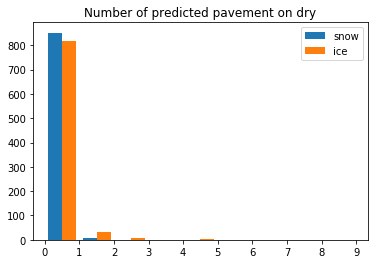

In [85]:
ax = plt.subplot()
ax.hist(road_type_freq[pred_t <= 500], bins=range(0,10), label=labels)
ax.set_title('Number of predicted pavement on dry')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()

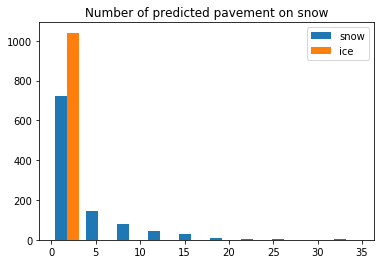

In [80]:
ax = plt.subplot()
ax.hist(road_type_freq[(500<pred_t) & (pred_t<=1000)], label=labels)
ax.set_title('Number of predicted pavement on snow')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()

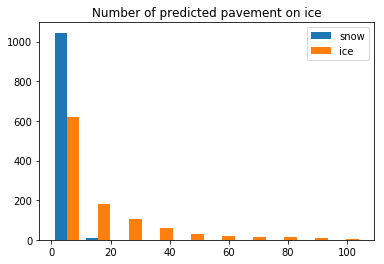

In [83]:
ax = plt.subplot()
ax.hist(road_type_freq[pred_t > 1000], label=labels)
ax.set_title('Number of predicted pavement on ice')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()

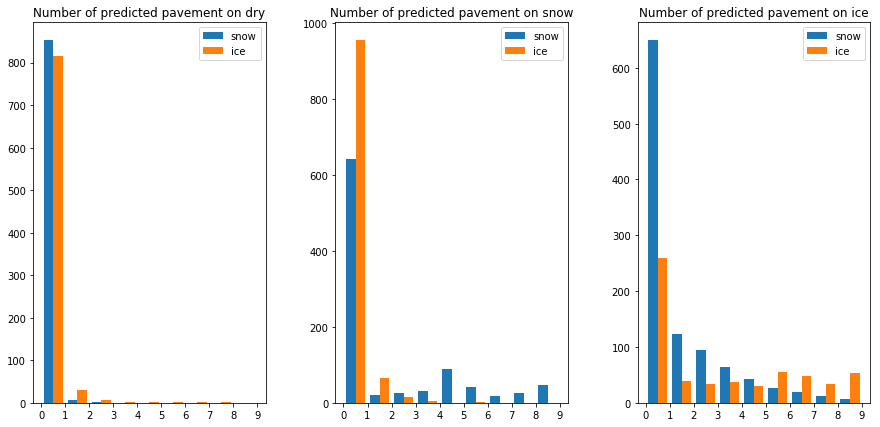

In [81]:
%matplotlib inline 
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(wspace=0.3, hspace=0.8)
colors = ['blue','red']
labels = ['snow', 'ice']

ax = plt.subplot(1,3,1)
ax.hist(road_type_freq[pred_t <= 500], bins=range(0,10), label=labels)
ax.set_title('Number of predicted pavement on dry')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()
ax = plt.subplot(1,3,2)
ax.hist(road_type_freq[(500<pred_t) & (pred_t<=1000)], bins=range(0,10), label=labels)
ax.set_title('Number of predicted pavement on snow')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()
ax = plt.subplot(1,3,3)
ax.hist(road_type_freq[pred_t > 1000], bins=range(0,10), label=labels)
ax.set_title('Number of predicted pavement on ice')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()

### Clustering 

In [12]:
all_keys = [tuple([i,j]) for i in range(1,7) for j in range(4) if (not (i == 4 and j == 0)) and (not (i == 6 and j == 3))]

In [210]:
def change_CV_driving_behavior(inter_no):
    dry_dur,snow_dur,ice_dur = [0,500],[500,1000],[1000,1500]
    if (inter_no[0] == 0) or (max(info_to_CV[inter_no[0]]) == 0):
        t = Vissim.Simulation.AttValue('SimSec')
        if dry_dur[0] <= t <= dry_dur[1]:
            return '100'
        elif snow_dur[0] <= t <= snow_dur[1]:
            return '101'
        elif ice_dur[0] <= t <= ice_dur[1]:
            return '102'
    elif max(info_to_CV[inter_no[0]]) == 1:
        return '103'
    else:
        return '104'

In [2]:
def assign_intersection_with_direction(row):
    link, pos = row[0], row[1]
    if link == 1:
        if 97 < pos < 197: 
            return [2,2]
        elif 197 < pos < 297: 
            return [2,3]
        elif 3567 < pos < 3667:
            return [1,2]
        elif 3667 < pos < 3767:
            return [1,3]
        else: 
            return [0,0]       
    elif link == 2:
        if 3636 < pos < 3736: 
            return [2,3]
        elif 3736 < pos < 3836: 
            return [2,2]
        elif 160 < pos < 260:
            return [1,3]
        elif 260 < pos < 360:
            return [1,2]
        else: 
            return [0,0]      
    elif link == 3:
        if 63 < pos < 163: 
            return [3,1]
        elif 163 < pos < 263: 
            return [3,0]
        elif 699 < pos < 799:
            return [2,1]
        elif 799 < pos < 899:
            return [2,0]
        else: 
            return [0,0]      
    elif link == 4:
        if 90 < pos < 190: 
            return [2,0]
        elif 190 < pos < 290: 
            return [2,1]
        elif 706 < pos < 806:
            return [3,0]
        else: 
            return [0,0]      
    elif link == 5:
        if 77 < pos < 177: 
            return [3,2]
        elif 177 < pos < 277: 
            return [3,1]
        elif 1741 < pos < 1841:
            return [4,2]
        else: 
            return [0,0]      
    elif link == 6:
        if 0 < pos < 100: 
            return [4,2]
        elif 1581 < pos < 1681:
            return [3,3]
        elif 1681 < pos < 1781:
            return [3,2]
        else: 
            return [0,0]      
    elif link == 7:
        if 0 < pos < 100: 
            return [4,1]
        elif 1497 < pos < 1597: 
            return [5,2]
        else: 
            return [0,0]       
    elif link == 8:
        if 116 < pos < 216: 
            return [5,3]
        elif 216 < pos < 316: 
            return [5,2]
        elif 1723 < pos < 1823:
            return [4,1]
        else: 
            return [0,0]     
    elif link == 9:
        if 0 < pos < 100: 
            return [4,3]
        elif 574 < pos < 674: 
            return [6,2]
        else: 
            return [0,0]      
    elif link == 10:
        if 0 < pos < 100: 
            return [6,2]
        elif 574 < pos < 674: 
            return [4,3]
        else: 
            return [0,0]       
    elif link == 11:
        if 93 < pos < 193: 
            return [1,0]
        elif 193 < pos < 293: 
            return [1,1]
        elif 1779 < pos < 1879:
            return [6,0]
        elif 1879 < pos < 1979:
            return [6,1]
        elif 2984 < pos < 3084:
            return [5,0]
        elif 3084 < pos < 3184:
            return [5,1]
        else: 
            return [0,0]  
    elif link == 10015:
        return [2,2]
    elif link == 10005:
        return [2,1]
    elif link == 10002:
        return [3,1]
    elif link == 10017:
        return [3,3]
    elif link == 10008:
        return [4,3]
    elif link == 10003 or link == 10004:
        return [4,2]
    elif link == 10020 or link == 10000:
        return [4,1]
    elif link == 10022:
        return [5,2]
    elif link == 10021:
        return [5,0]
    elif link == 10007:
        return [6,0]
    elif link == 10006:
        return [6,2]
    elif link == 10001:
        return [1,2]
    elif link == 10018:
        return [3,0]
    else:
        return [0,0]

In [213]:
def transmit_data_to_RSE_with_direction(RSE2CV_interval=1):
    global SimSec
    
    ds = Vissim.Net.Vehicles.GetMultipleAttributes((
            'SimSec','No','CoordFrontX','CoordFrontY','Acceleration', 'Speed', 'WheelSpeed', 'Lane\\Link\\No', 'Pos'))
    if len(ds) != 0:
        ds = np.asarray(ds, dtype=np.float32)
        ds = ds[~(ds[:,6] == None)]
        ds = np.round(ds, 2)       
        inter_no = np.apply_along_axis(assign_intersection_with_direction, 1, ds[:,7:])
        for key in RSE:
            index = np.where((inter_no[:,0] == key[0]) & (inter_no[:,1] == key[1]))[0]
            if len(index) != 0:               
                RSE[key].append(ds[index,:7])
        cur_SimSec = Vissim.Simulation.AttValue('SimSec')
        if cur_SimSec - SimSec >= RSE2CV_interval:           
            info = [str(info_to_CV[no[0]]) if (no[0]!=0) else '' for no in inter_no]  
            veh_type = np.apply_along_axis(change_CV_driving_behavior, 1, inter_no)
            Vissim.Net.Vehicles.SetMultipleAttributes(('Inter_no','Info','VehType'),tuple(zip([str(i) for i in inter_no],info,veh_type)))
            SimSec = cur_SimSec

In [218]:
def single_run_RSE_real_time(interval = 21, keep_RSE=False):
    global RSE, info_to_CV
    global RSE_store
    RSE = dict(zip(all_keys,[[] for _ in range(24)]))
    for _ in range(interval):       
        Vissim.Simulation.RunSingleStep()
        transmit_data_to_RSE_with_direction()
    prediction_in_RSE(cluster=True, keep_RSE = keep_RSE)

In [26]:
def cluster_filter(pred):
    n_snow = sum(pred==1)
    n_ice = sum(pred==2)
    if n_snow <= 3 and n_ice <= 3:
        pred[(pred==1) | (pred==2)] = 0
        final_pred = 0
    elif n_snow > n_ice:
        pred[pred==2] = 1
        final_pred = 1
    elif n_snow <= n_ice:
        pred[pred==1] = 2
        final_pred = 2
    return pred, final_pred

<IPython.core.display.Javascript object>


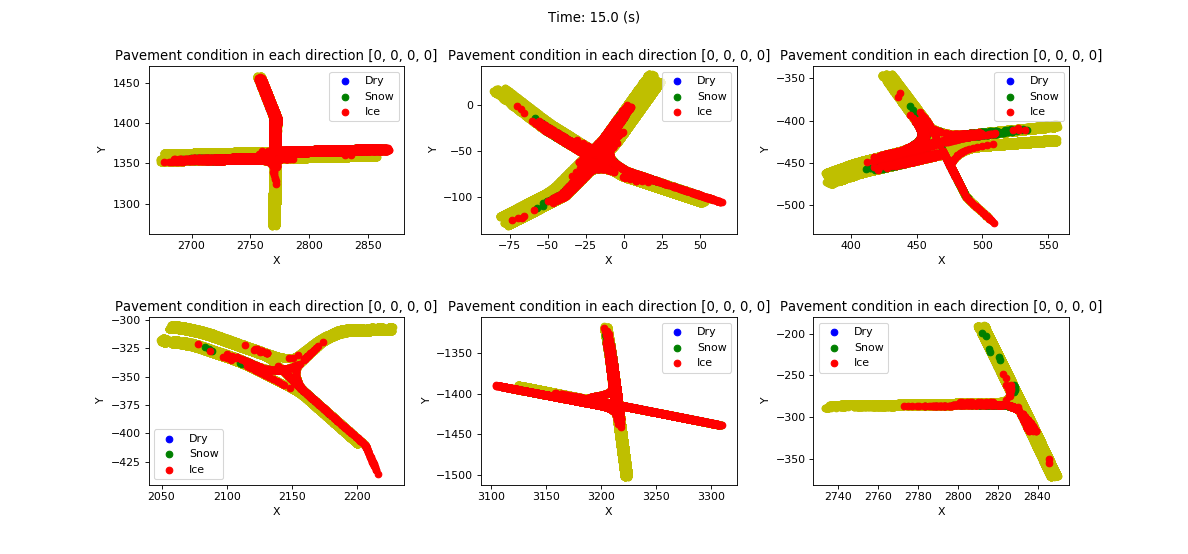

In [237]:
%matplotlib notebook
plt.ion()
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.suptitle(f'Time: {0:.1f} (s)')
ax_list = [fig.add_subplot(2,3,i) for i in range(1,7)]

RSE_store = dict(zip(all_keys,[[] for _ in range(24)]))
info_to_CV = {1:[0,0,0,0],2:[0,0,0,0],3:[0,0,0,0],4:[0,0,0,0],5:[0,0,0,0],6:[0,0,0,0]}
SimSec = 0
loc = locations[(locations[:,5] <= 500)]

for key in range(1,7):
    ax = ax_list[key-1]
    ax.scatter(loc[loc[:,3] == key, 0], loc[loc[:,3] == key, 1], c='y')
    ax.scatter([], [], c='b', label='Dry')
    ax.scatter([], [], c='g', label='Snow')
    ax.scatter([], [], c='r', label='Ice')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Detected Road Type at #{key} Inter')
    
for _ in range(150):
    single_run_RSE_real_time(interval = 101)
    for key in RSE:
        pred = RSE[key][-1][0]
        ax = ax_list[key[0]-1]
        if pred != []:      
            loc_RSE = RSE[key][-1][1]   
            loc_dry = loc_RSE[pred == 0]
            loc_snow = loc_RSE[pred == 1]
            loc_ice = loc_RSE[pred == 2]

#            ax.scatter(loc_dry[:,2], loc_dry[:,3], c='b', label='Dry')
            ax.scatter(loc_snow[:,2], loc_snow[:,3], c='g', label='Snow')
            ax.scatter(loc_ice[:,2], loc_ice[:,3], c='r', label='Ice')
        
    for i, ax in enumerate(ax_list):
        ax.set_title(f'Pavement condition in each direction {info_to_CV[i+1]}')
       
    fig.suptitle(f"Time: {(Vissim.Simulation.AttValue('SimSec')):.1f} (s)")
    fig.canvas.draw()
    fig.canvas.flush_events()

In [16]:
#np.save('RSE_store_cluster.npy', RSE_store) 
RSE_store = np.load('RSE_store_cluster.npy').item()

In [21]:
all_pred = []
pred_time = []
for key in RSE_store:
    data = []
    pred = []
    loc = []
    for row in RSE_store[key]:
        data.append(row[0])
        pred.append(row[1])
        loc.append(row[2])
    data = np.concatenate(data, axis=0)
    pred = np.concatenate(pred, axis=0)
    loc = np.concatenate(loc, axis=0)
    all_pred.append(pred)
    pred_time.append(loc[:,0])
    
    dry_dry, dry_snow, dry_ice =  len(pred[(loc[:,0]<=500) & (pred==0)]), len(pred[(loc[:,0]<=500) & (pred==1)]), len(pred[(loc[:,0]<=500) & (pred==2)])
    snow_dry, snow_snow, snow_ice = len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==0)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==1)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==2)])
    ice_dry, ice_snow, ice_ice = len(pred[(loc[:,0]>1000) & (pred==0)]), len(pred[(loc[:,0]>1000) & (pred==1)]), len(pred[(loc[:,0]>1000) & (pred==2)])
    if ice_snow+snow_snow+dry_snow == 0:
        snow_precision = 1
    elif ice_ice+snow_ice+dry_ice == 0:
        ice_precision = 1
    else:      
        snow_precision = np.round(snow_snow/(ice_snow+snow_snow+dry_snow),4)
        ice_precision = np.round(ice_ice/(ice_ice+snow_ice+dry_ice),4)        
    print(f'Inter #{key}: dry:{dry_dry,dry_snow,dry_ice} snow:{snow_dry,snow_snow,snow_ice} ice:{ice_dry,ice_snow,ice_ice} precision:{snow_precision,ice_precision}')  

all_pred = np.concatenate(all_pred, axis=0)
pred_time = np.concatenate(pred_time, axis=0)
snow_precision_all = len(all_pred[(all_pred==1)&(pred_time>500)&(pred_time<=1000)])/len(all_pred[all_pred==1])
ice_precision_all = len(all_pred[(all_pred==2)&(pred_time>1000)])/len(all_pred[all_pred==2])
print(f'Overall precision:{snow_precision_all,ice_precision_all}')

Inter #(1, 0): dry:(2209, 0, 0) snow:(2208, 273, 0) ice:(2887, 0, 1404) precision:(1.0, 1.0)
Inter #(1, 1): dry:(1188, 0, 0) snow:(1652, 0, 0) ice:(2275, 0, 57) precision:(1, 1.0)
Inter #(1, 2): dry:(2832, 0, 0) snow:(3938, 167, 0) ice:(4532, 0, 788) precision:(1.0, 1.0)
Inter #(1, 3): dry:(3431, 0, 0) snow:(3813, 290, 0) ice:(4235, 0, 1505) precision:(1.0, 1.0)
Inter #(2, 0): dry:(921, 0, 0) snow:(1010, 90, 0) ice:(1154, 0, 334) precision:(1.0, 1.0)
Inter #(2, 1): dry:(1218, 0, 0) snow:(1849, 81, 0) ice:(2057, 0, 543) precision:(1.0, 1.0)
Inter #(2, 2): dry:(3208, 0, 0) snow:(4418, 172, 0) ice:(4372, 0, 590) precision:(1.0, 1.0)
Inter #(2, 3): dry:(2685, 0, 0) snow:(3546, 95, 0) ice:(3818, 0, 776) precision:(1.0, 1.0)
Inter #(3, 0): dry:(1874, 0, 0) snow:(2557, 218, 0) ice:(2501, 0, 544) precision:(1.0, 1.0)
Inter #(3, 1): dry:(1241, 0, 0) snow:(2045, 87, 0) ice:(2115, 0, 339) precision:(1.0, 1.0)
Inter #(3, 2): dry:(1945, 0, 0) snow:(3090, 86, 0) ice:(2572, 0, 520) precision:(1.0, 1.

In [69]:
Counter(row[1]).most_common(1)

[(0.0, 47)]

In [78]:
warning = []
warning_time = []

for key in RSE_store:
    for row in RSE_store[key]:       
        warning.append(max(row[1]))
        warning_time.append(max(row[2][:,0]))
        
warning = np.asarray(warning)
warning_time = np.asarray(warning_time)

In [79]:
len(warning[warning==0]), len(warning[warning==1]), len(warning[warning==2])

(2157, 286, 512)

In [80]:
len(warning[(warning_time<=500) & (warning==0)]), len(warning[(warning_time<=500) & (warning==1)]), len(warning[(warning_time<=500) & (warning==2)])

(860, 0, 0)

In [81]:
len(warning[(warning_time>500) & (warning_time<=1000) & (warning==0)]), len(warning[(warning_time>500) & (warning_time<=1000) & (warning==1)]), len(warning[(warning_time>500) & (warning_time<=1000) & (warning==2)])

(763, 285, 0)

In [82]:
len(warning[(warning_time>1000) & (warning==0)]), len(warning[(warning_time>1000) & (warning==1)]), len(warning[(warning_time>1000) & (warning==2)])

(534, 1, 512)

In [83]:
np.sort(warning_time[warning==1])

array([ 504.7,  504.8,  511.6,  514.7,  515.1,  515.1,  524.9,  525.1,
        525.2,  525.2,  525.2,  531.8,  534.9,  535.1,  535.1,  535.2,
        535.2,  535.2,  535.3,  535.3,  535.3,  535.3,  545.3,  545.3,
        545.3,  545.3,  545.3,  545.4,  545.4,  545.4,  545.4,  545.4,
        545.4,  545.4,  545.4,  555.1,  555.1,  555.3,  555.3,  555.5,
        565.4,  565.5,  565.6,  575.7,  575.7,  585.4,  585.4,  585.7,
        585.8,  585.8,  594.9,  595.5,  595.6,  595.7,  595.9,  595.9,
        595.9,  595.9,  595.9,  605.9,  605.9,  606. ,  606. ,  606. ,
        606. ,  606. ,  606. ,  606. ,  614.1,  616.1,  616.1,  616.1,
        620.2,  626. ,  626.1,  626.2,  626.2,  626.2,  633.3,  636.1,
        636.3,  636.3,  636.3,  644.9,  646.2,  646.3,  646.4,  646.4,
        646.4,  646.4,  646.4,  656.4,  656.4,  656.5,  656.5,  656.5,
        656.5,  656.5,  666.3,  666.6,  666.6,  666.6,  666.6,  666.6,
        666.6,  666.6,  676.5,  676.7,  676.7,  676.7,  684.8,  685.2,
      

In [84]:
(np.sort(warning_time[warning==1])[0]-500)/500

0.0094000244140625

In [55]:
np.sort(warning_time[warning==2])

array([1010. , 1019.9, 1030.1, 1030.2, 1030.2, 1030.2, 1030.2, 1040.3,
       1040.3, 1040.3, 1040.3, 1060.3, 1060.5, 1060.5, 1060.5, 1070.6,
       1070.6, 1077.2, 1080.5, 1080.7, 1090.8, 1090.8, 1090.8, 1090.8,
       1090.8, 1100.9, 1100.9, 1100.9, 1110.9, 1120.8, 1121.1, 1121.1,
       1130.8, 1131.2, 1131.2, 1131.2, 1140.9, 1141.3, 1141.3, 1151.1,
       1151.4, 1151.4, 1151.4, 1151.4, 1161.5, 1165.6, 1169.6, 1171.4,
       1171.6, 1191.8, 1191.8, 1191.8, 1201.9, 1201.9, 1201.9, 1211.8,
       1212. , 1212. , 1212. , 1212. , 1212. , 1212. , 1212. , 1220.6,
       1222.1, 1242.3, 1252.4, 1252.4, 1252.4, 1252.4, 1262.5, 1262.5,
       1262.5, 1262.5, 1272.2, 1272.3, 1272.5, 1272.6, 1272.6, 1272.6,
       1282.7, 1282.7, 1292.7, 1302.5, 1302.8, 1302.9, 1302.9, 1302.9,
       1313. , 1313. , 1313. , 1321.6, 1323. , 1323. , 1323.1, 1323.1,
       1323.1, 1333.2, 1333.2, 1333.2, 1333.2, 1343.3, 1353.1, 1353.1,
       1363.3, 1363.5, 1363.5, 1373.2, 1373.4, 1373.6, 1373.6, 1373.6,
      

In [85]:
(np.sort(warning_time[warning==2])[0]-1000)/500

0.019800048828125

### RSE to CV

In [220]:
np.save('RSE_store_CV.npy', RSE_store)

In [221]:
all_pred = []
pred_time = []
for key in RSE_store:
    data = []
    pred = []
    loc = []
    for row in RSE_store[key]:
        data.append(row[0])
        pred.append(row[1])
        loc.append(row[2])
    data = np.concatenate(data, axis=0)
    pred = np.concatenate(pred, axis=0)
    loc = np.concatenate(loc, axis=0)
    all_pred.append(pred)
    pred_time.append(loc[:,0])
    
    dry_dry, dry_snow, dry_ice =  len(pred[(loc[:,0]<=500) & (pred==0)]), len(pred[(loc[:,0]<=500) & (pred==1)]), len(pred[(loc[:,0]<=500) & (pred==2)])
    snow_dry, snow_snow, snow_ice = len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==0)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==1)]), len(pred[(loc[:,0]>500) & (loc[:,0]<=1000) & (pred==2)])
    ice_dry, ice_snow, ice_ice = len(pred[(loc[:,0]>1000) & (pred==0)]), len(pred[(loc[:,0]>1000) & (pred==1)]), len(pred[(loc[:,0]>1000) & (pred==2)])
    if ice_snow+snow_snow+dry_snow == 0:
        snow_precision = 1
    elif ice_ice+snow_ice+dry_ice == 0:
        ice_precision = 1
    else:      
        snow_precision = np.round(snow_snow/(ice_snow+snow_snow+dry_snow),4)
        ice_precision = np.round(ice_ice/(ice_ice+snow_ice+dry_ice),4)        
    print(f'Inter #{key}: dry:{dry_dry,dry_snow,dry_ice} snow:{snow_dry,snow_snow,snow_ice} ice:{ice_dry,ice_snow,ice_ice} precision:{snow_precision,ice_precision}')  

all_pred = np.concatenate(all_pred, axis=0)
pred_time = np.concatenate(pred_time, axis=0)
snow_precision_all = len(all_pred[(all_pred==1)&(pred_time>500)&(pred_time<=1000)])/len(all_pred[all_pred==1])
ice_precision_all = len(all_pred[(all_pred==2)&(pred_time>1000)])/len(all_pred[all_pred==2])
print(f'Overall precision:{snow_precision_all,ice_precision_all}')

Inter #(1, 0): dry:(2209, 0, 0) snow:(2208, 273, 0) ice:(2887, 0, 1404) precision:(1.0, 1.0)
Inter #(1, 1): dry:(1188, 0, 0) snow:(1652, 0, 0) ice:(2275, 0, 57) precision:(1, 1.0)
Inter #(1, 2): dry:(2832, 0, 0) snow:(3938, 167, 0) ice:(4532, 0, 788) precision:(1.0, 1.0)
Inter #(1, 3): dry:(3431, 0, 0) snow:(3813, 290, 0) ice:(4235, 0, 1505) precision:(1.0, 1.0)
Inter #(2, 0): dry:(921, 0, 0) snow:(1010, 90, 0) ice:(1154, 0, 334) precision:(1.0, 1.0)
Inter #(2, 1): dry:(1218, 0, 0) snow:(1849, 81, 0) ice:(2057, 0, 543) precision:(1.0, 1.0)
Inter #(2, 2): dry:(3208, 0, 0) snow:(4418, 172, 0) ice:(4372, 0, 590) precision:(1.0, 1.0)
Inter #(2, 3): dry:(2685, 0, 0) snow:(3546, 95, 0) ice:(3818, 0, 776) precision:(1.0, 1.0)
Inter #(3, 0): dry:(1874, 0, 0) snow:(2557, 218, 0) ice:(2501, 0, 544) precision:(1.0, 1.0)
Inter #(3, 1): dry:(1241, 0, 0) snow:(2045, 87, 0) ice:(2115, 0, 339) precision:(1.0, 1.0)
Inter #(3, 2): dry:(1945, 0, 0) snow:(3090, 86, 0) ice:(2572, 0, 520) precision:(1.0, 1.

## Test safety improvement

### Generate safety measures

In [42]:
def parseFzp(fileNames, outputName):
    """
    This function parse the input fzp files, remove redundant header lines
    save the data into a .csv file
    """
    headerWritten = False
    dest = open(outputName, 'w')
    myWriter = csv.writer(dest)
    for f in fileNames:
        targetLine = False
        coorLoc = -1
        with open(f, 'r') as myFile:
            for line in myFile:
                if line.startswith("$VEHICLE"):
                    line = line.replace("$VEHICLE:", "").replace("\r", "").replace("\n", "")
                    header = line.split(";")
                    headerC = [elem.replace("\\", "-") for elem in header]
                    headerC.append('X')
                    headerC.append('Y')
                    headerC.append('Z')
                    coorLoc = headerC.index("COORDFRONT")
                    if not headerWritten:
                        myWriter.writerow(headerC)
                        headerWritten = True
                    targetLine = True
                    continue
                if targetLine:
                    line = line.replace("\r", "").replace("\n", "")
                    row = line.split(";")
                    rowC = [elem.strip(' ') for elem in row]
                    coor = rowC[coorLoc].split(" ")
                    rowC.append(coor[0])
                    rowC.append(coor[1])
                    rowC.append(coor[2])
                    myWriter.writerow(rowC)
    dest.close()

In [10]:
path = 'D:/Slippery/S1/AA_S1_test_CV.fzp'
fzpFileNames = glob.glob(path)
outputName = 'AA_S1_test_CV.csv'
parseFzp(fzpFileNames, outputName)

In [24]:
ds = pd.read_csv('AA_S1_test_normal.csv')
ds.head()

,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,COORDFRONT,ACCELERATION,SPEED,WHEELSPEED,DESSPEED,QTIME,LEADTARGNO,LEADTARGTYPE,X,Y,Z
0,6.5,1,100,1,2,99.963,-81.072 -131.122 0.000,-0.29,61.45,61.42,62.29,0.0,59.0,Conflict area,-81.072,-131.122,0.0
1,6.6,1,100,1,2,101.669,-79.777 -130.018 0.000,-0.29,61.34,61.44,62.29,0.0,59.0,Conflict area,-79.777,-130.018,0.0
2,6.7,1,100,1,2,103.371,-78.483 -128.916 0.000,-0.29,61.23,61.44,62.29,0.0,59.0,Conflict area,-78.483,-128.916,0.0
3,6.8,1,100,1,2,105.071,-77.192 -127.816 0.000,-0.29,61.13,61.45,62.29,0.0,59.0,Conflict area,-77.192,-127.816,0.0
4,6.9,1,100,1,2,106.767,-75.903 -126.718 0.000,-0.29,61.02,61.32,62.29,0.0,59.0,Conflict area,-75.903,-126.718,0.0


In [25]:
set(ds.LEADTARGTYPE)

{'Conflict area',
 'Reduced speed area',
 'Signal head',
 'Stop sign',
 'Vehicle',
 nan}

In [26]:
ds.columns

Index(['SIMSEC', 'NO', 'VEHTYPE', 'LANE-LINK-NO', 'LANE-INDEX', 'POS',
       'COORDFRONT', 'ACCELERATION', 'SPEED', 'WHEELSPEED', 'DESSPEED',
       'QTIME', 'LEADTARGNO', 'LEADTARGTYPE', 'X', 'Y', 'Z'],
      dtype='object')

In [27]:
ds.drop(columns = ['COORDFRONT', 'Z'], inplace=True)
ds = ds.reset_index()

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216009 entries, 0 to 1216008
Data columns (total 16 columns):
index           1216009 non-null int64
SIMSEC          1216009 non-null float64
NO              1216009 non-null int64
VEHTYPE         1216009 non-null int64
LANE-LINK-NO    1216009 non-null int64
LANE-INDEX      1216009 non-null int64
POS             1216009 non-null float64
ACCELERATION    1216009 non-null float64
SPEED           1216009 non-null float64
WHEELSPEED      1216009 non-null float64
DESSPEED        1216009 non-null float64
QTIME           1216009 non-null float64
LEADTARGNO      1151359 non-null float64
LEADTARGTYPE    1151359 non-null object
X               1216009 non-null float64
Y               1216009 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 148.4+ MB


In [29]:
ds['WACCELERATION'] = ds['ACCELERATION']
ds.ACCELERATION[(ds.VEHTYPE == 101) & (ds.ACCELERATION > 3.4)] = 3.4
ds.ACCELERATION[(ds.VEHTYPE == 101) & (ds.ACCELERATION < -3.4)] = -3.4
ds.ACCELERATION[(ds.VEHTYPE == 102) & (ds.ACCELERATION > 1.7)] = 1.7
ds.ACCELERATION[(ds.VEHTYPE == 102) & (ds.ACCELERATION < -1.7)] = -1.7

In [30]:
a = ds[ds.LEADTARGTYPE == 'Vehicle']
a.head()

,index,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,ACCELERATION,SPEED,WHEELSPEED,DESSPEED,QTIME,LEADTARGNO,LEADTARGTYPE,X,Y,WACCELERATION
58,58,9.0,6,100,1,2,99.978,-0.21,59.68,59.60,61.68,0.0,1.0,Vehicle,-81.061,-131.113,-0.21
63,63,9.1,6,100,1,2,101.635,-0.21,59.60,59.80,61.68,0.0,1.0,Vehicle,-79.802,-130.040,-0.21
68,68,9.2,6,100,1,2,103.289,-0.21,59.53,59.46,61.68,0.0,1.0,Vehicle,-78.545,-128.969,-0.21
73,73,9.3,6,100,1,2,104.942,-0.21,59.45,59.63,61.68,0.0,1.0,Vehicle,-77.290,-127.900,-0.21
78,78,9.4,6,100,1,2,106.592,-0.21,59.37,59.47,61.68,0.0,1.0,Vehicle,-76.036,-126.831,-0.21


In [7]:
def calculate_safety_measures(row):
    inter_no = assign_intersection_with_direction(row[['LANE-LINK-NO', 'POS']])
    row_l = ds[(ds.SIMSEC==row.SIMSEC) & (ds.NO==row.LEADTARGNO)]
    if len(row_l) == 0:
        return inter_no, -1, 0, -1
    row = row[['X','Y','SPEED','ACCELERATION']].values
    row_l = row_l[['X','Y','SPEED','ACCELERATION']].values[0]
    
    s_diff = np.round((row[2]-row_l[2])/3.6,3)
    d = np.round(np.sqrt((row[0]-row_l[0])**2 + (row[1]-row_l[1])**2),3)
    a_diff = np.round(row[3]-row_l[3],3)
    
    if s_diff <= 0:
        TTC = -1
        DRAC = 0
    else:        
        TTC = d/s_diff
        DRAC = s_diff**2/d

    if a_diff == 0:
        if s_diff <= 0:
            MTTC = -1
        else:
            MTTC = d/s_diff
    elif a_diff < 0:
        temp = (s_diff)**2 + 2*a_diff*d
        if temp < 0:
            MTTC = -1
        else:
            MTTC = (-s_diff - np.sqrt(temp))/a_diff
    else:
        temp = np.sqrt((s_diff)**2 + 2*a_diff*d)
        t1 = (-s_diff - temp)/a_diff
        t2 = (-s_diff + temp)/a_diff
        if (t1 > 0) and (t2 > 0):
            MTTC = min(t1,t2)
        else:           
            MTTC = max(t1,t2)
        
    return inter_no,TTC, DRAC, MTTC

In [8]:
from pandarallel import pandarallel
pandarallel.initialize()

New pandarallel memory created - Size: 2000 MB
Pandarallel will run on 12 workers


In [31]:
a = ds[ds.LEADTARGTYPE == 'Vehicle'].parallel_apply(calculate_safety_measures, axis = 1)

In [32]:
ds = ds[ds.LEADTARGTYPE == 'Vehicle']

In [33]:
a = pd.DataFrame(a).values

In [34]:
a[0][0]

([2, 2], -1, 0, -1)

In [35]:
ds['INTER'] = [temp[0][0][0] for temp in a]
ds['TTC'] = [temp[0][1] for temp in a]
ds['DRAC'] = [temp[0][2] for temp in a]
ds['MTTC'] = [temp[0][3] for temp in a]
ds[['TTC','DRAC','MTTC']] = ds[['TTC','DRAC','MTTC']].round(3)

In [36]:
ds.drop(columns = ['LEADTARGTYPE'], inplace=True)
ds = ds.reset_index()
ds.head()

,level_0,index,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,ACCELERATION,SPEED,...,DESSPEED,QTIME,LEADTARGNO,X,Y,WACCELERATION,INTER,TTC,DRAC,MTTC
0,58,58,9.0,6,100,1,2,99.978,-0.21,59.68,...,61.68,0.0,1.0,-81.061,-131.113,-0.21,2,-1.0,0.0,-1.0
1,63,63,9.1,6,100,1,2,101.635,-0.21,59.60,...,61.68,0.0,1.0,-79.802,-130.040,-0.21,2,-1.0,0.0,-1.0
2,68,68,9.2,6,100,1,2,103.289,-0.21,59.53,...,61.68,0.0,1.0,-78.545,-128.969,-0.21,2,-1.0,0.0,-1.0
3,73,73,9.3,6,100,1,2,104.942,-0.21,59.45,...,61.68,0.0,1.0,-77.290,-127.900,-0.21,2,-1.0,0.0,-1.0
4,78,78,9.4,6,100,1,2,106.592,-0.21,59.37,...,61.68,0.0,1.0,-76.036,-126.831,-0.21,2,-1.0,0.0,-1.0


In [37]:
ds.to_csv('AA_S1_test_normal_1.csv',index=False)

### Evaluate safety improvement

In [86]:
ds = pd.read_csv('AA_S1_test_normal_1.csv')
ds_CV = pd.read_csv('AA_S1_test_CV_1.csv')

In [91]:
pave_type_dict = {0:'dry', 1: 'snowy', 2:'icy'}
pave_type_dict

{0: 'dry', 1: 'snowy', 2: 'icy'}

In [134]:
def hist_of_safety_measures(ds_normal,ds_CV):
    samples_normal = ds_normal[['TTC', 'DRAC', 'MTTC']].values
    samples_CV = ds_CV[['TTC', 'DRAC', 'MTTC']].values
    targets_normal = ds_normal['VEHTYPE'].values-100
    targets_CV = ds_CV['VEHTYPE'].values-100
    labels = ['Normal vehicle', 'Connected vehicle']

    for pave_type in [0,1,2]:
                
        vehs_normal = samples_normal[targets_normal==pave_type]
        vehs_CV = samples_CV[targets_CV==pave_type]        
        fig = plt.figure(figsize=(10, 5), dpi=300)
        fig.subplots_adjust(wspace=0.3, hspace=0.2)
        fig.suptitle(f'Surrogate safety measures on {pave_type_dict[pave_type]} pavement')

        ax = plt.subplot(1,3,1)
        ax.hist([vehs_normal[:,0],vehs_CV[:,0]],bins=[0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4], label=labels)
        ax.set_xlabel('TTC')
#        ax.set_ylabel('count')
        ax.set_ylim(0,4000)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.3))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(500))        
        ax.legend()        
        
        ax = plt.subplot(1,3,2)
        ax.hist([vehs_normal[:,2],vehs_CV[:,2]],bins=[0,0.5,1,1.5,2,2.5,3,3.5], label=labels)
        ax.set_xlabel('MTTC')
#       ax.set_ylabel('count')
        ax.set_ylim(0,4000)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
        ax.legend()          
        
        ax = plt.subplot(1,3,3)
        ax.hist([vehs_normal[:,1],vehs_CV[:,1]],bins=[3,4,5,6,7,8,9,10], label=labels)
        ax.set_xlabel('DRAC')
#        ax.set_ylabel('count') 
        ax.set_ylim(0,5000)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(500))        
        ax.legend()          

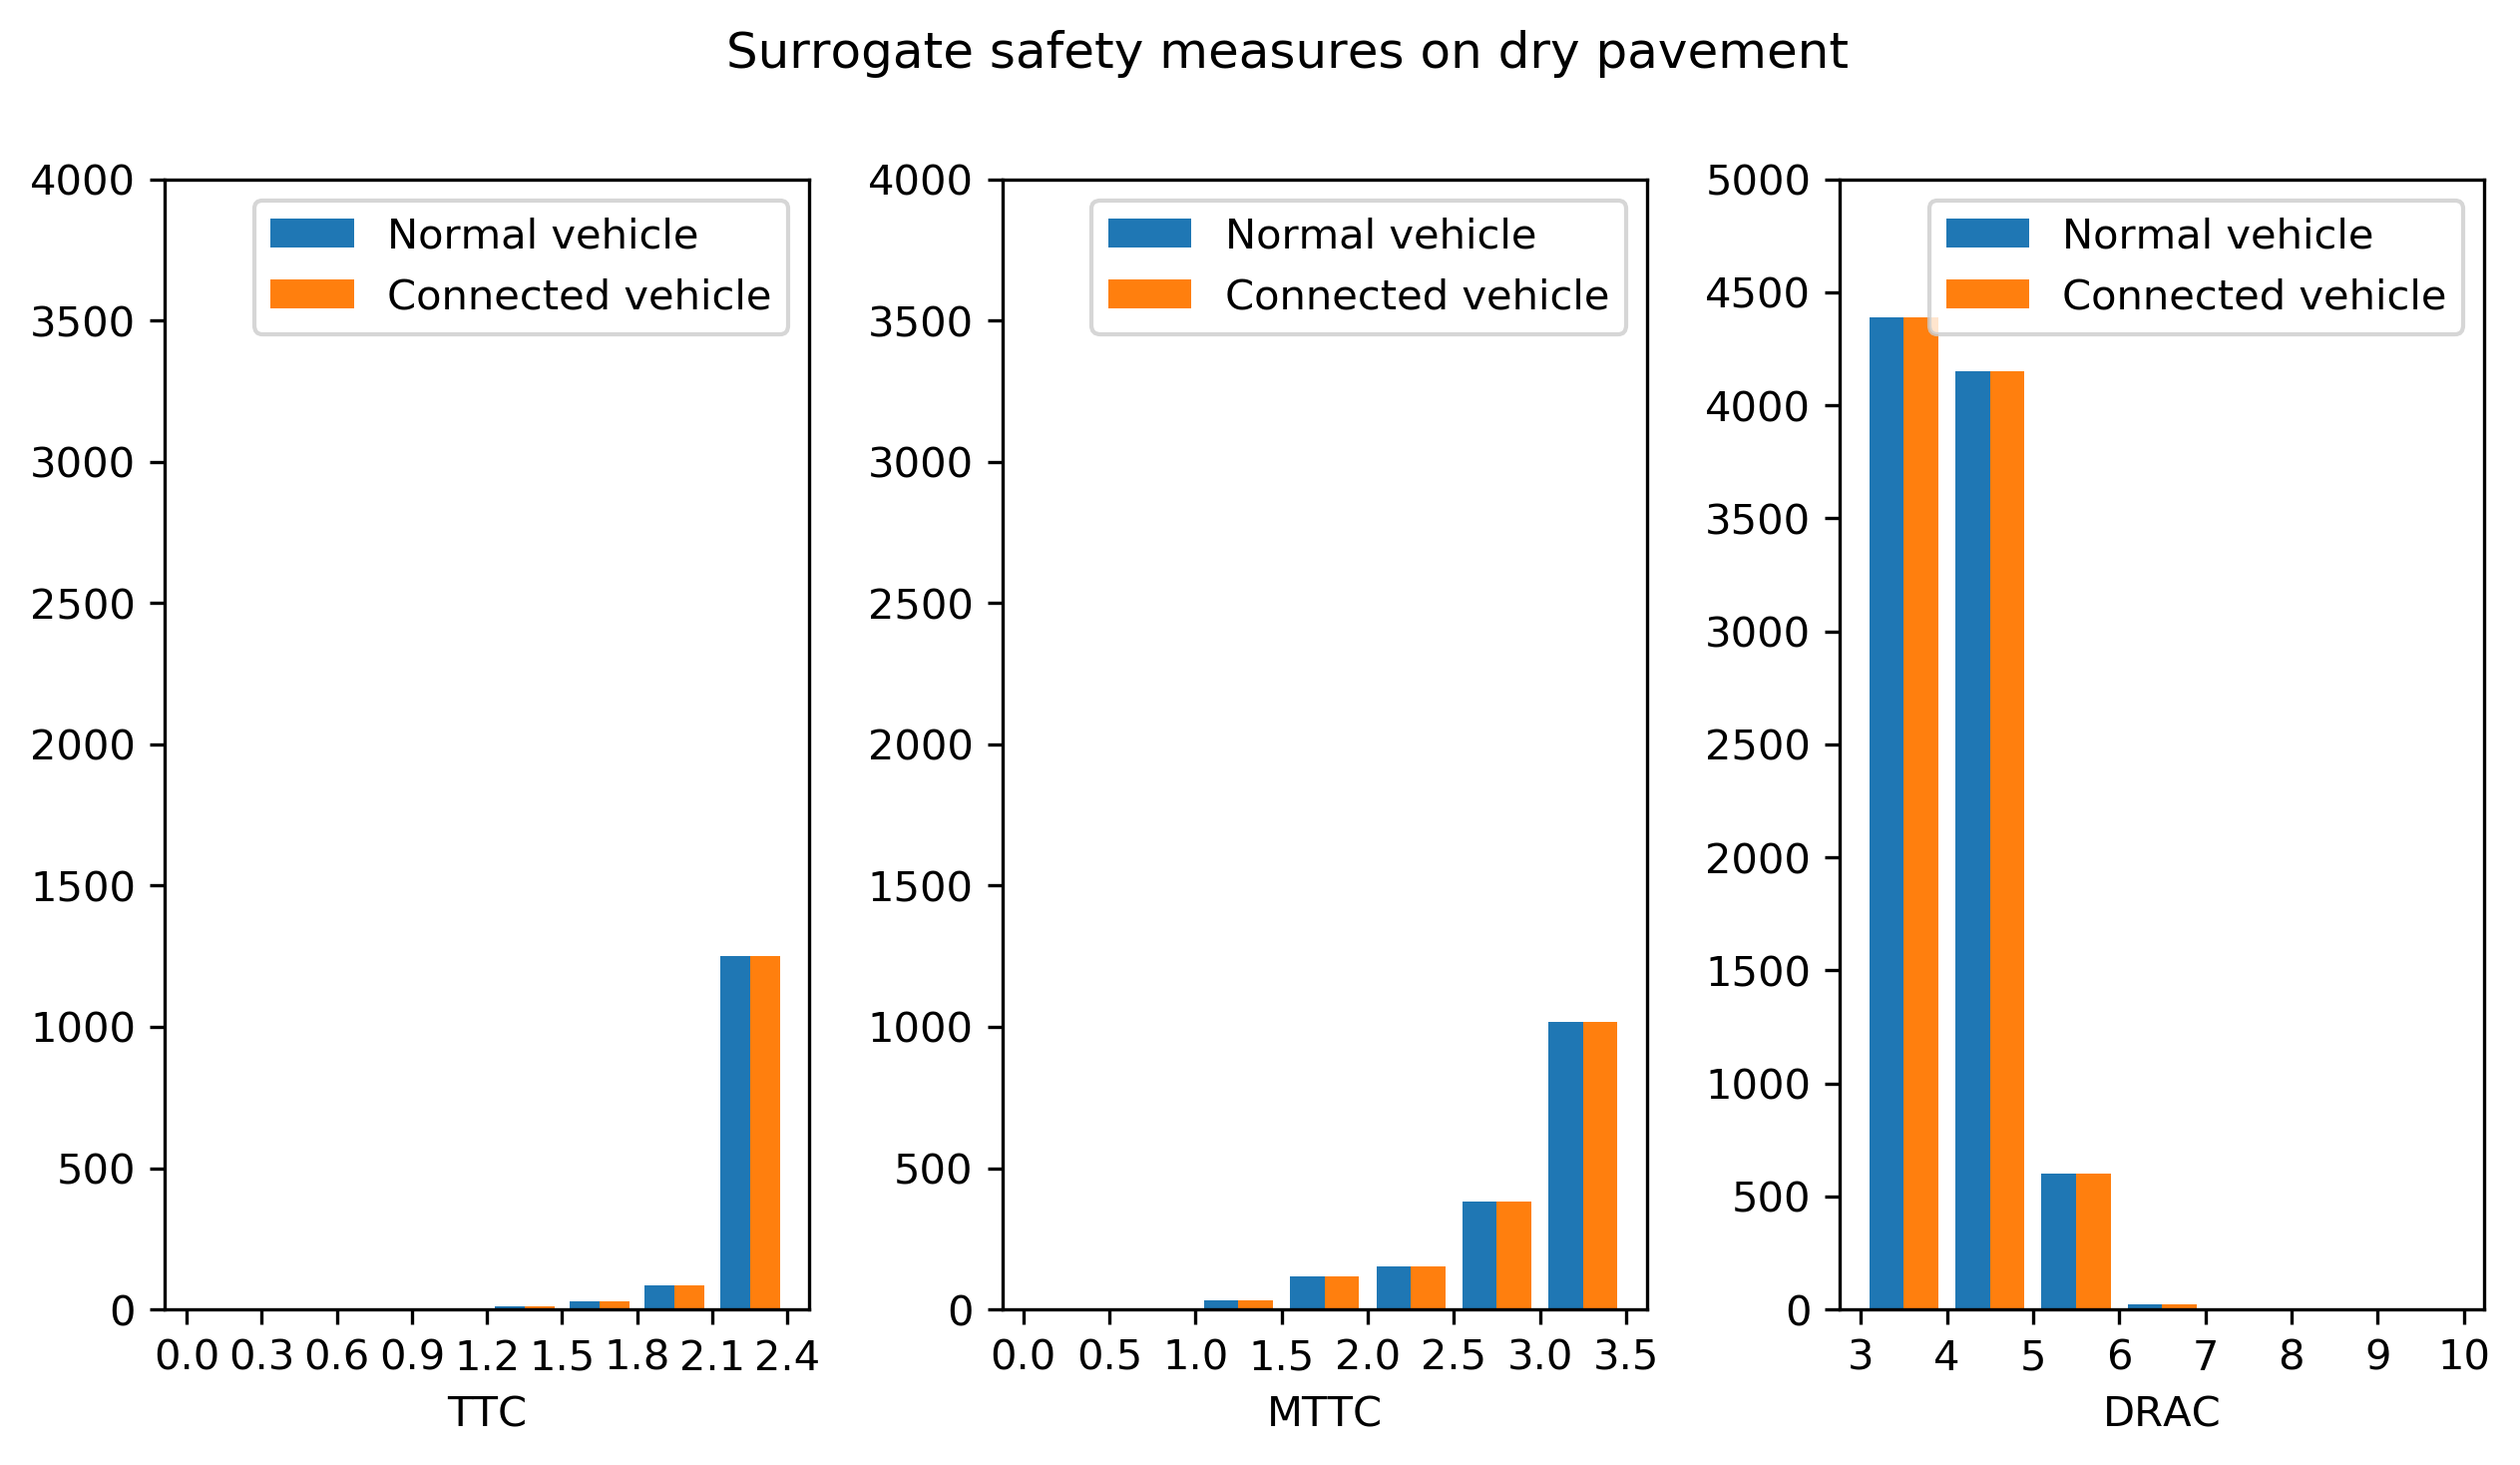

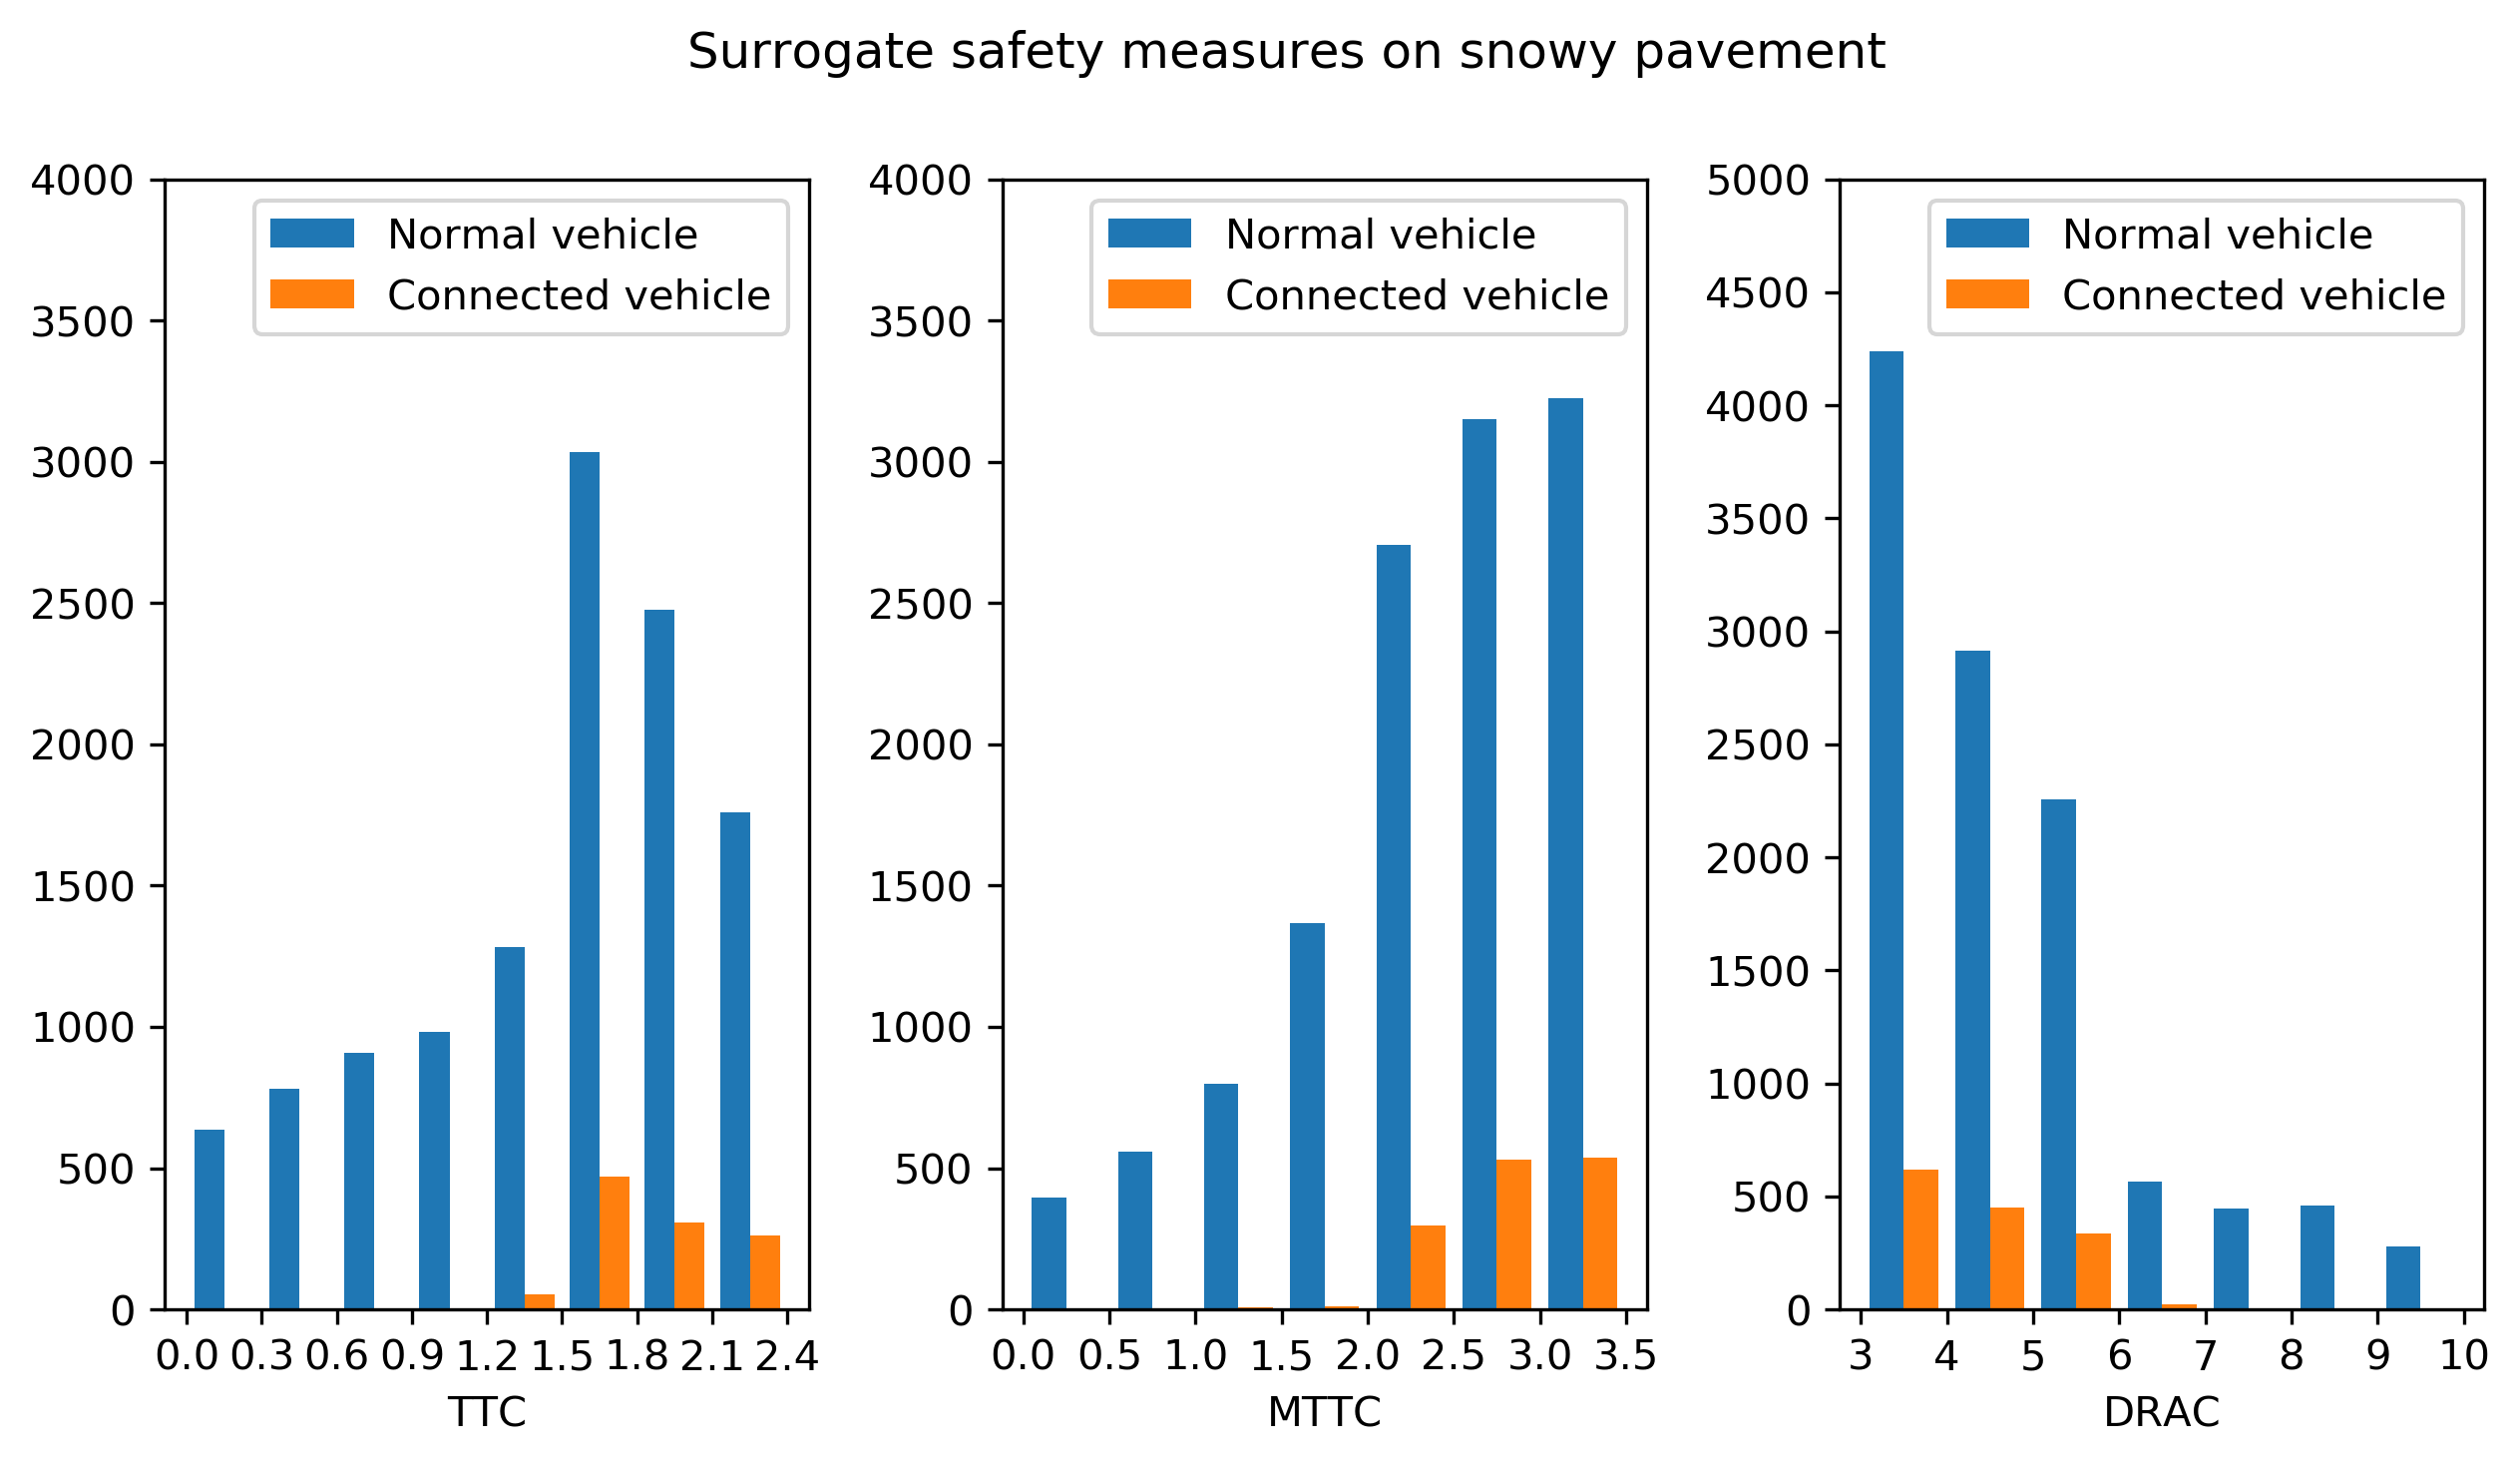

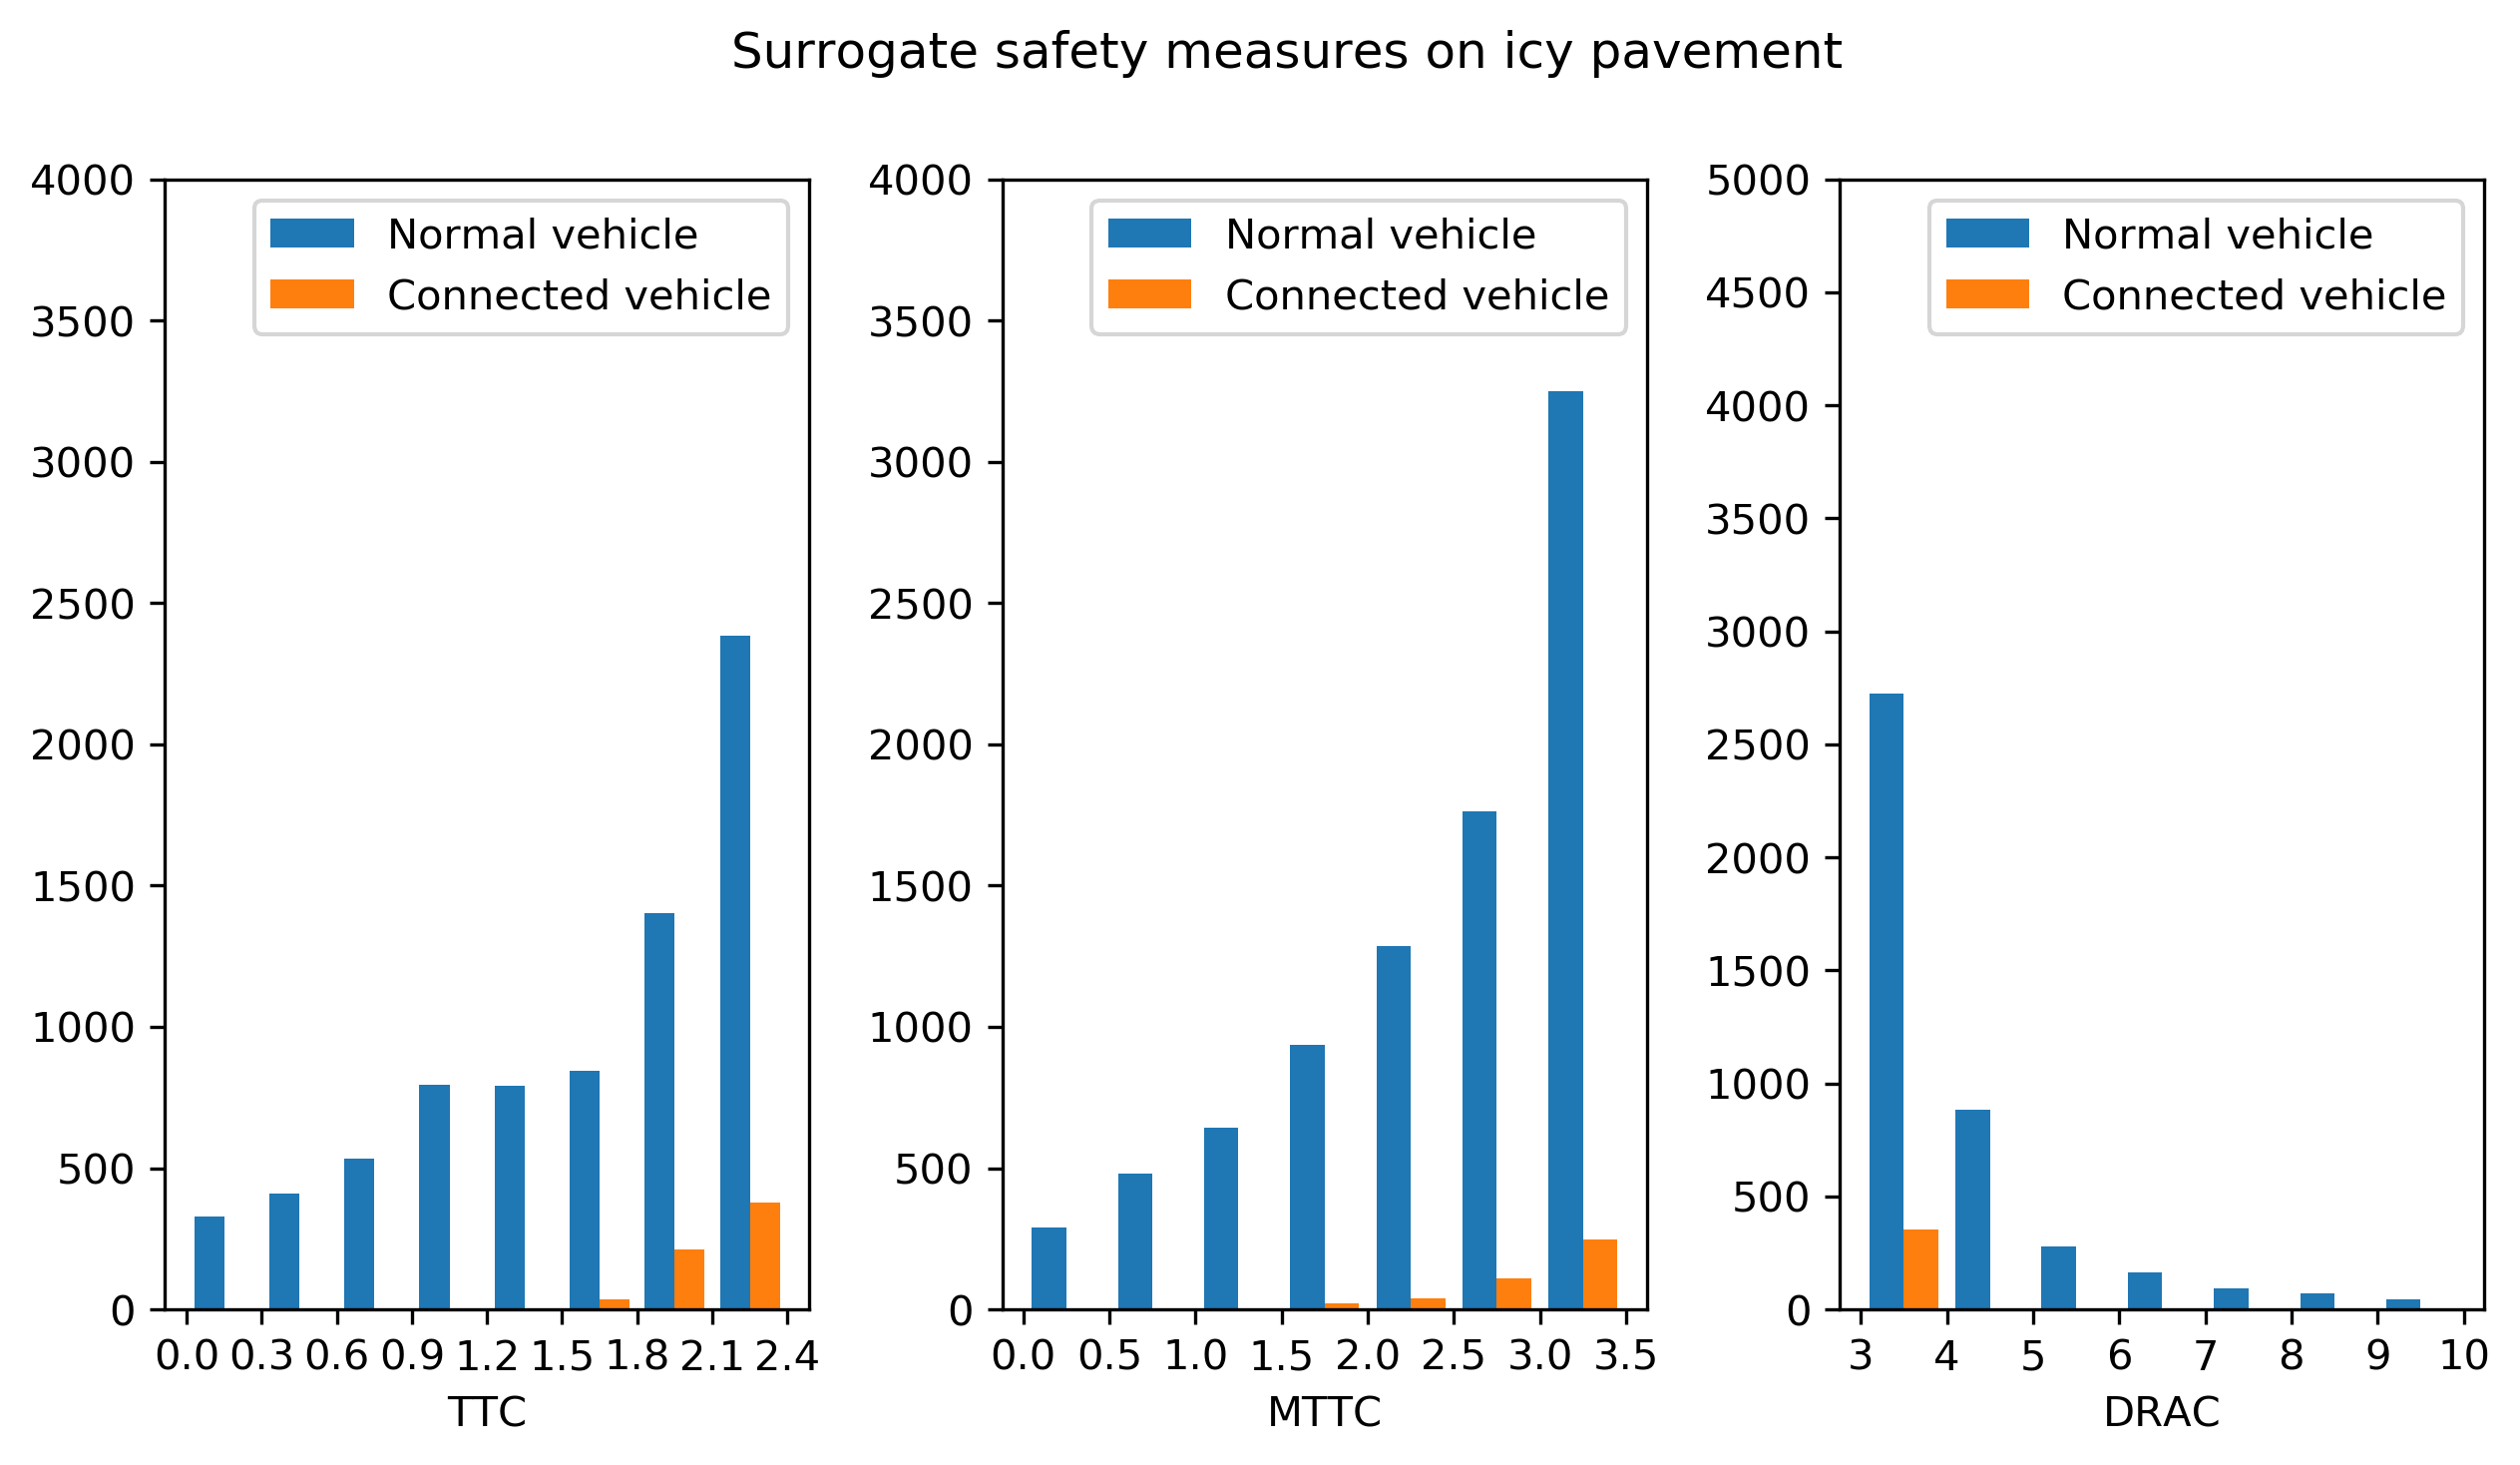

In [135]:
hist_of_safety_measures(ds, ds_CV)

In [149]:
pave_type = 100
print(len(ds[(ds.TTC >= 0) & (ds.TTC <= 2.4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.MTTC>=0) & (ds.MTTC<=4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.DRAC>3) & (ds.VEHTYPE == pave_type)]))
print(len(ds_CV[(ds_CV.TTC >= 0) & (ds_CV.TTC <= 2.4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.MTTC>=0) & (ds_CV.MTTC<=4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.DRAC>3) & (ds_CV.VEHTYPE == pave_type)]))

1374 4244 9164
1374 4244 9164


In [152]:
pave_type = 101
ttc_nv, mttc_nv, drac_nv = len(ds[(ds.TTC >= 0) & (ds.TTC <= 2.4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.MTTC>=0) & (ds.MTTC<=4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.DRAC>3) & (ds.VEHTYPE == pave_type)])
ttc_cv, mttc_cv, drac_cv = len(ds_CV[(ds_CV.TTC >= 0) & (ds_CV.TTC <= 2.4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.MTTC>=0) & (ds_CV.MTTC<=4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.DRAC>3) & (ds_CV.VEHTYPE == pave_type)])
print(ttc_nv, mttc_nv, drac_nv)
print(ttc_cv, mttc_cv, drac_cv)
print((ttc_nv-ttc_cv)/ttc_nv,(mttc_nv-mttc_cv)/mttc_nv,(drac_nv-drac_cv)/drac_nv)

11861 15226 12237
1104 1904 1437
0.9069218447011214 0.8749507421515829 0.8825692571708752


In [153]:
pave_type = 102
ttc_nv, mttc_nv, drac_nv = len(ds[(ds.TTC >= 0) & (ds.TTC <= 2.4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.MTTC>=0) & (ds.MTTC<=4) & (ds.VEHTYPE == pave_type)]),len(ds[(ds.DRAC>3) & (ds.VEHTYPE == pave_type)])
ttc_cv, mttc_cv, drac_cv = len(ds_CV[(ds_CV.TTC >= 0) & (ds_CV.TTC <= 2.4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.MTTC>=0) & (ds_CV.MTTC<=4) & (ds_CV.VEHTYPE == pave_type)]),len(ds_CV[(ds_CV.DRAC>3) & (ds_CV.VEHTYPE == pave_type)])
print(ttc_nv, mttc_nv, drac_nv)
print(ttc_cv, mttc_cv, drac_cv)
print((ttc_nv-ttc_cv)/ttc_nv,(mttc_nv-mttc_cv)/mttc_nv,(drac_nv-drac_cv)/drac_nv)

7493 12830 4592
629 966 355
0.9160549846523421 0.9247077162899454 0.922691637630662


In [ ]:
vehs_normal[:,0],vehs_CV[:,0]

In [ ]:
vehs_normal[:,2],vehs_CV[:,2]

In [ ]:
vehs_normal[:,2],vehs_CV[:,2]